<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Laboratorios/Laboratorio%201/MINE_4206_202510_AML_Lab1_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

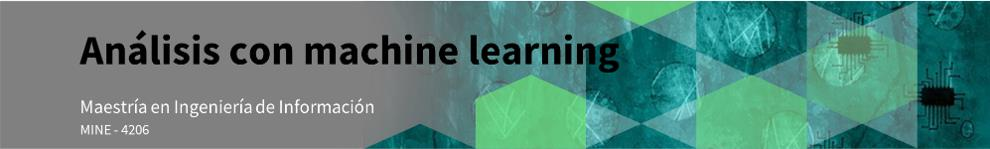

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos](#scrollTo=1ttPWxrdUToF)<br>
[0. Instalación e importación de librerías](#scrollTo=VjLUweXbT9aj)<br>
[1. Introducción a los datos](#scrollTo=E4jCt71BUCiy)<br>
[2. Modelamiento](#scrollTo=VuVy2tMSUG_3)<br>
&nbsp;&nbsp;[2.1. Regresión lineal](#scrollTo=Bxp2ddxtQQoe)<br>
&nbsp;&nbsp;[2.2. Regresión lineal + StandardScaler()](#scrollTo=booaG5FribaY)<br>
[3. Preguntas.](#scrollTo=iFnQ0xgaQegd)<br>

---
# Contexto y objetivos

Las emisiones de CO2 tienen importantes impactos ambientales. La acumulación de CO2 en la atmósfera contribuye al efecto invernadero, atrapando calor y provocando el calentamiento global. Esto conduce a diversos efectos adversos, incluido el aumento de las temperaturas globales, el aumento del nivel del mar, cambios en los patrones climáticos y alteraciones de los ecosistemas. Las consecuencias a largo plazo del cambio climático pueden afectar negativamente la salud humana, la agricultura, la biodiversidad y los sistemas socioeconómicos.

Por tanto, reducir las emisiones de CO2 es crucial para mitigar el cambio climático y minimizar sus efectos nocivos sobre el medio ambiente y el bienestar humano. Esto implica hacer la transición a fuentes de energía más limpias y renovables, mejorar la eficiencia energética, adoptar prácticas sostenibles y promover esfuerzos de conservación.
El set de datos reúne información de emisiones de automotores e información de consumo de combustible.

#### **Con apoyo del negocio ha sido posible elaborar el siguiente diccionario de datos**:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Make** | Nombre del fabricante de automotores. |
| **Model** | Modelo del automotor. |
| **Vehicle Class** | Clase de vehículo. |
| **Engine Size (L)** | Tamaño del motor. Las unidades están expresadas en litros. |
| **Transmission** | Tipo de transmisión del vehículo, automática o manual. |
| **Fuel Type** | Tipo de combustible: *Regular Gasoline* (X), *Premium Gasoline* (Z), *Ethanol* (E), *Diesel* (D), *Natural Gas* (N). |
| **Fuel Consumption City (L/100km)** | Consumo del vehículo en ciudad. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Hwy (L/100 km)** | Consumo del vehículo en carretera. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Comb (L/100 km)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en litros por kilómetro.|
| **Fuel Consumption Comb (mpg)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en millas por galón. |
| **CO2 Emissions(g/km)** | Cantidad de gramos emitidos de C02 por kilometro. |



#### **Objetivos**:
* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una Regresión Lineal.
* Familiarizarse con la herramienta de Jupyter Notebook.

**Datos**: Información obtenida de [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions).

---
# 0. Instalación e importación de librerías

Las librerías que se van a utilizar, por lo general se tienen que instalar desde consola mediante el comando `pip`, de esta forma estarán disponibles  dentro del ambiente donde se está ejecutando el Notebook. Sin embargo, si se encuentran en un ambiente compartido como Google Colab o simplemente desean realizar la instalación de los paquetes desde el mismo notebook lo pueden hacer con el siguiente código

```
!pip install [nom_paquete]
```

Por ejemplo:
```
!pip install pandas
```

In [ ]:
!pip install ydata-profiling plotly -q # -q quiet

In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

---
# 1. Introducción a los datos

El negocio ha hecho la entrega de la información en un archivo plano en formato csv, el cual cargaremos a continuación:

In [ ]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202510_AML/refs/heads/main/Laboratorios/Laboratorio%201/CO2_Emissions.csv'
data = pd.read_csv(url)

Para estar seguros de la carga de la información, visualizaremos las primeras 20 filas:

In [ ]:
data.head(20)

Make         Model Vehicle Class  Engine Size(L)  Cylinders  \
0          ACURA           ILX       COMPACT             2.0          4   
1          ACURA           ILX       COMPACT             2.4          4   
2          ACURA    ILX HYBRID       COMPACT             1.5          4   
3          ACURA       MDX 4WD   SUV - SMALL             3.5          6   
4          ACURA       RDX AWD   SUV - SMALL             3.5          6   
5          ACURA           RLX      MID-SIZE             3.5          6   
6          ACURA            TL      MID-SIZE             3.5          6   
7          ACURA        TL AWD      MID-SIZE             3.7          6   
8          ACURA        TL AWD      MID-SIZE             3.7          6   
9          ACURA           TSX       COMPACT             2.4          4   
10         ACURA           TSX       COMPACT             2.4          4   
11         ACURA           TSX       COMPACT             3.5          6   
12    ALFA ROMEO            4C    TWO-SEATER             1.8          4   
13  ASTON MARTIN           DB9   MINICOMPACT             5.9         12   
14  ASTON MARTIN        RAPIDE    SUBCOMPACT             5.9         12   
15  ASTON MARTIN    V8 VANTAGE    TWO-SEATER             4.7          8   
16  ASTON MARTIN    V8 VANTAGE    TWO-SEATER             4.7          8   
17  ASTON MARTIN  V8 VANTAGE S    TWO-SEATER             4.7          8   
18  ASTON MARTIN  V8 VANTAGE S    TWO-SEATER             4.7          8   
19  ASTON MARTIN      VANQUISH   MINICOMPACT             5.9         12   

   Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0           AS5         Z                               9.9   
1            M6         Z                              11.2   
2           AV7         Z                               6.0   
3           AS6         Z                              12.7   
4           AS6         Z                              12.1   
5           AS6         Z                              11.9   
6           AS6         Z                              11.8   
7           AS6         Z                              12.8   
8            M6         Z                              13.4   
9           AS5         Z                              10.6   
10           M6         Z                              11.2   
11          AS5         Z                              12.1   
12          AM6         Z                               9.7   
13           A6         Z                              18.0   
14           A6         Z                              18.0   
15          AM7         Z                              17.4   
16           M6         Z                              18.1   
17          AM7         Z                              17.4   
18           M6         Z                              18.1   
19           A6         Z                              18.0   

    Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                               6.7                               8.5   
1                               7.7                               9.6   
2                               5.8                               5.9   
3                               9.1                              11.1   
4                               8.7                              10.6   
5                               7.7                              10.0   
6                               8.1                              10.1   
7                               9.0                              11.1   
8                               9.5                              11.6   
9                               7.5                               9.2   
10                              8.1                               9.8   
11                              8.3                              10.4   
12                              6.9                               8.4   
13                             12.6                              15.6   
14               

Para poder realizar el entrenamiento de nuestros algoritmos. Primero necesitaremos **dividir nuestros datos en datos de entrenamiento (train) y datos de evaluación (test)**. Esto con el fin de poder descubrir como le iría al modelo entrenado con datos que no ha conocido antes. Por lo general, se recomienda realizar un partición aleatoria y dejar una proporción $80\% - 20\%$. Sin embargo, estas divisiones pueden variar dependiendo del tipo de datos y del entrenamiento que estemos desarrollando.

El parámetro `random_state` corresponde a la reproducibilidad del código.

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

Make           Model         Vehicle Class  Engine Size(L)  \
3146   PORSCHE      CAYMAN GT4            TWO-SEATER             3.8   
4639  CHRYSLER     300 AWD FFV             FULL-SIZE             3.6   
5457     ACURA  MDX Hybrid AWD           SUV - SMALL             3.0   
1003    TOYOTA          TACOMA  PICKUP TRUCK - SMALL             4.0   
5583     BUICK    Envision AWD           SUV - SMALL             2.5   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
3146          6           M6         Z                              13.3   
4639          6           A8         X                              12.8   
5457          6          AM7         Z                               9.1   
1003          6           M6         X                              14.5   
5583          4           A6         X                              11.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
3146                             10.1                              11.8   
4639                              8.7                              11.0   
5457                              9.0                               9.0   
1003                             11.3                              13.1   
5583                              8.6                              10.0   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
3146                           24                  277  
4639                           26                  258  
5457                           31                  210  
1003                           22                  301  
5583                           28                  234

Antes de empezar a hacer el split de datos, realizamos ciertas transformaciones necesarias en los datos. Como la estandarización del tipo de transmisión, el tipo de combustible y la eliminación de filas duplicadas.

In [ ]:
# Estandarizacion tipo de transmisión
train['Transmission'] = train['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

# Estandarización tipo de combustible
train['Fuel Type'] = train['Fuel Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

## 1.1. Exploración básica de la información.

Nombres de las columnas en la información:

In [ ]:
train.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

La información descriptiva de los datos de entrada es la siguiente:

In [ ]:
train.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     5908.000000  5908.000000                       5908.000000   
mean         3.154062     5.609682                         12.542620   
std          1.359028     1.826665                          3.506176   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.000000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      5908.000000                       5908.000000   
mean                          9.037035                         10.965098   
std                           2.227830                          2.896409   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  5908.000000          5908.000000  
mean                     27.525220           250.518619  
std                       7.284553            58.973309  
min                      11.000000            96.000000  
25%                      22.000000           207.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5908 entries, 3146 to 5725
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5908 non-null   object 
 1   Model                             5908 non-null   object 
 2   Vehicle Class                     5908 non-null   object 
 3   Engine Size(L)                    5908 non-null   float64
 4   Cylinders                         5908 non-null   int64  
 5   Transmission                      5908 non-null   object 
 6   Fuel Type                         5908 non-null   object 
 7   Fuel Consumption City (L/100 km)  5908 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 10  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 11  CO2 Emissions(g/km)               5908 non-null   int64  
dtypes: float

Nos damos cuenta que en el `.info()` tenemos información interesante:
- El dataset tiene 12 columnas y 5908 filas
- De las 12 columnas tenemos 7 numéricas y 5 categóricas
- Ninguna de las columnas tiene datos nulos, pues de las 5908 entries en la linea dos, vemos 5908 non-null en la columna.

## 1.2. Análisis exploratorio de datos (EDA).

Comportamiento de las marcas

In [ ]:
train_0 = data['Make'].value_counts()

In [ ]:
train_0.info()

<class 'pandas.core.series.Series'>
Index: 42 entries, FORD to SRT
Series name: count
Non-Null Count  Dtype
--------------  -----
42 non-null     int64
dtypes: int64(1)
memory usage: 672.0+ bytes


In [ ]:
fig = px.bar(data, x=train_0.index, y=train_0.values)
fig.show()

Verificamos el comportamiento de los datos numéricos

<Figure size 2500x2000 with 0 Axes>

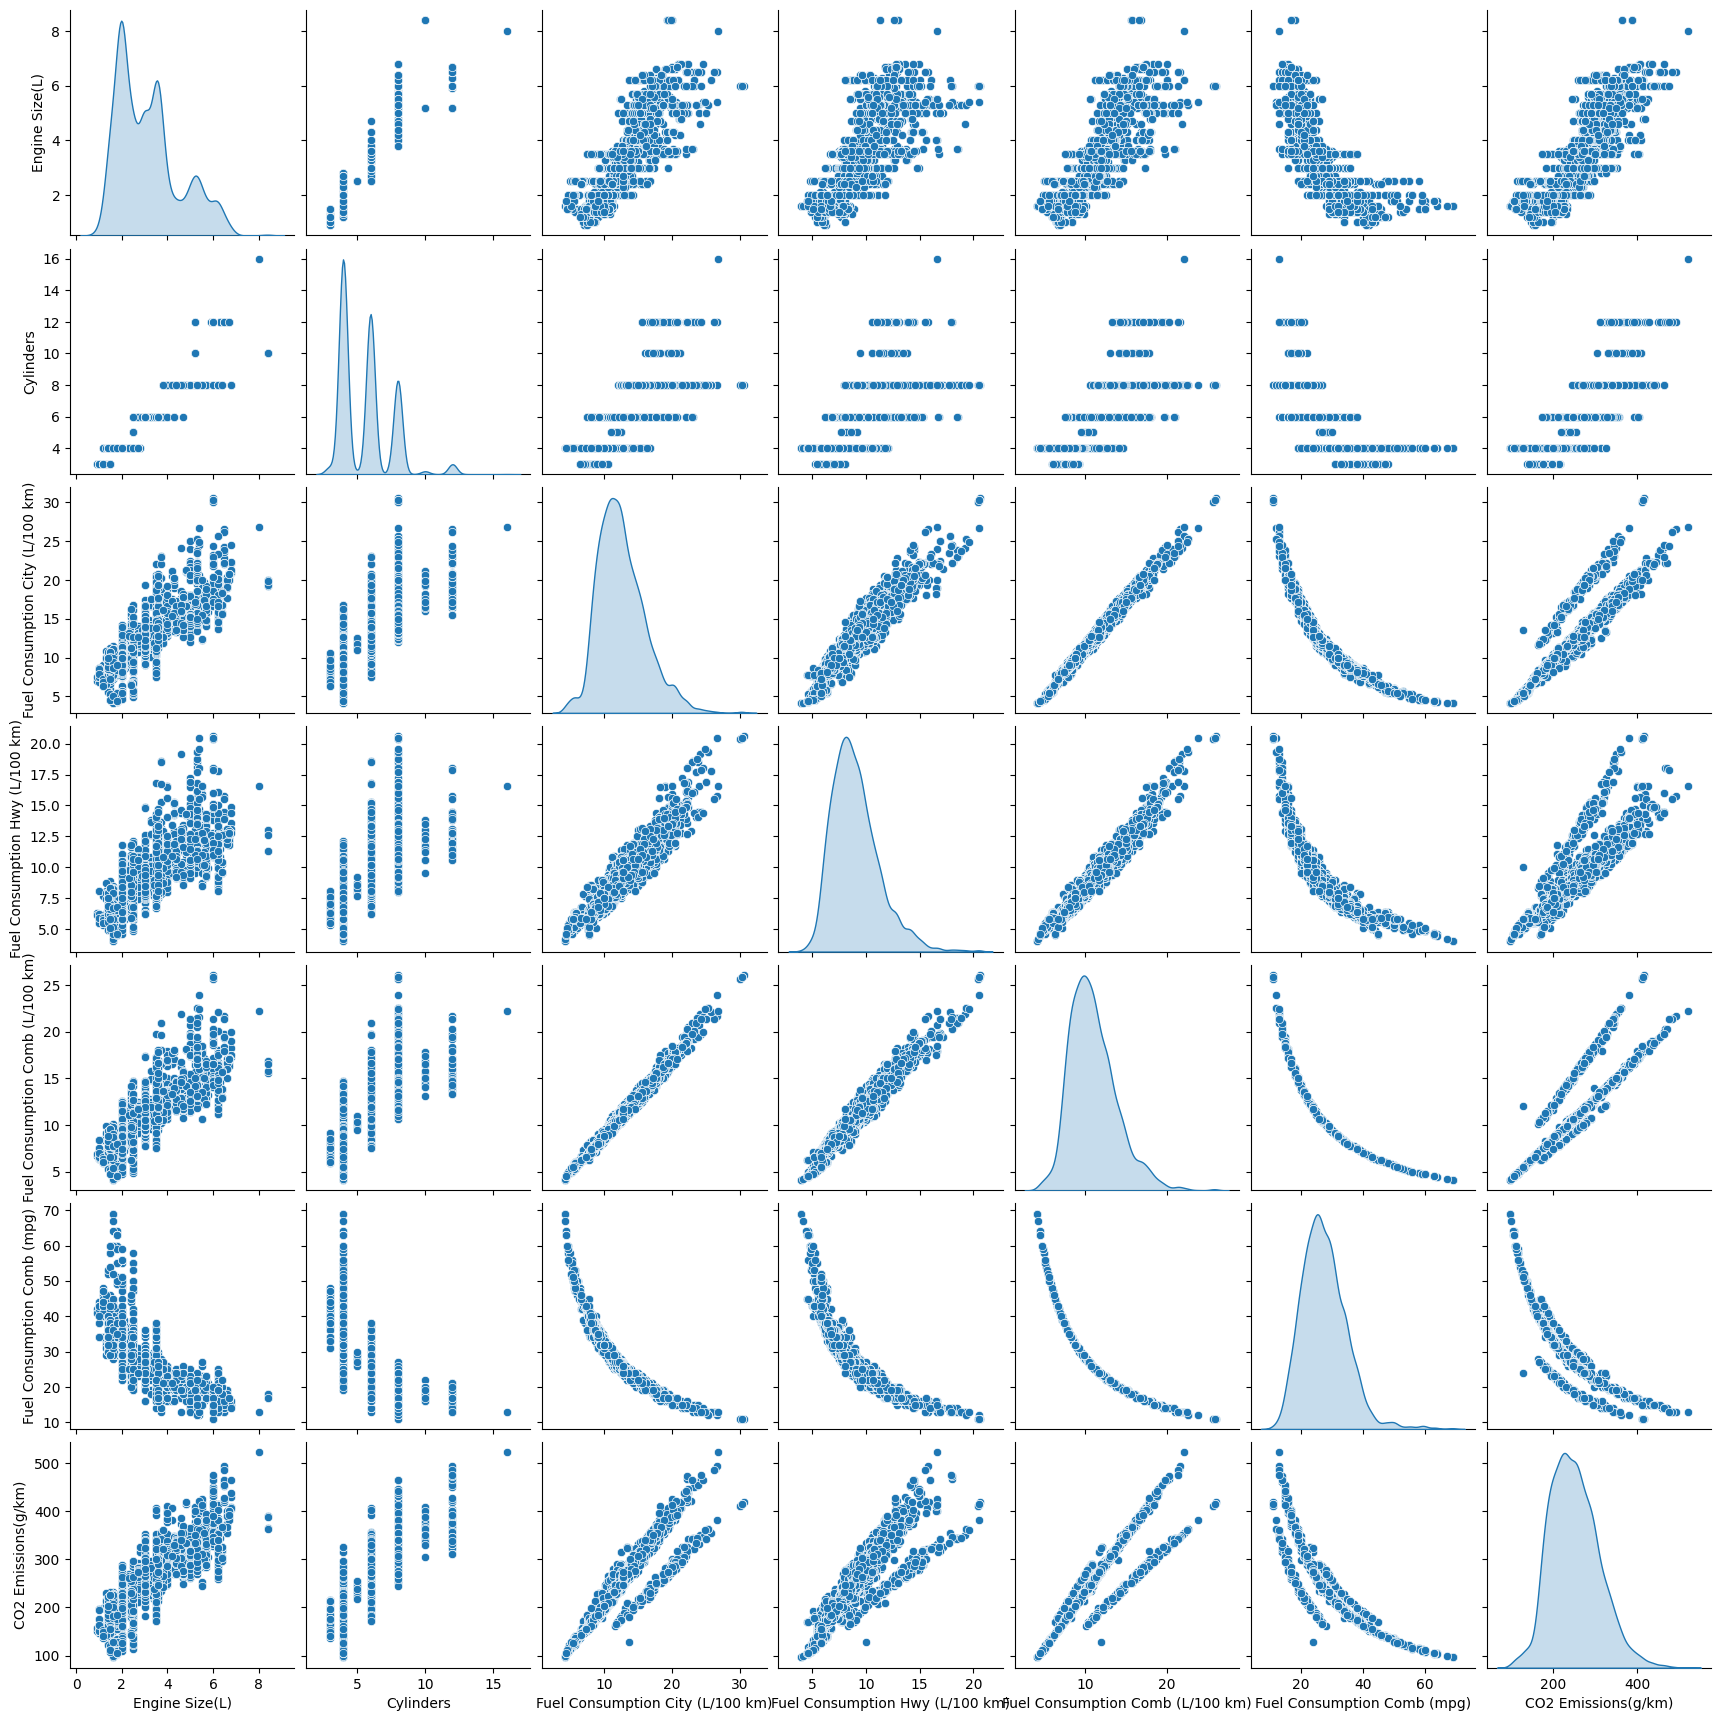

In [ ]:
plt.figure(figsize=(25, 20))
train_num = train[[ 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

sns.pairplot(train_num, diag_kind='kde')
plt.show()

Visualización gráfica de variables categóricas.

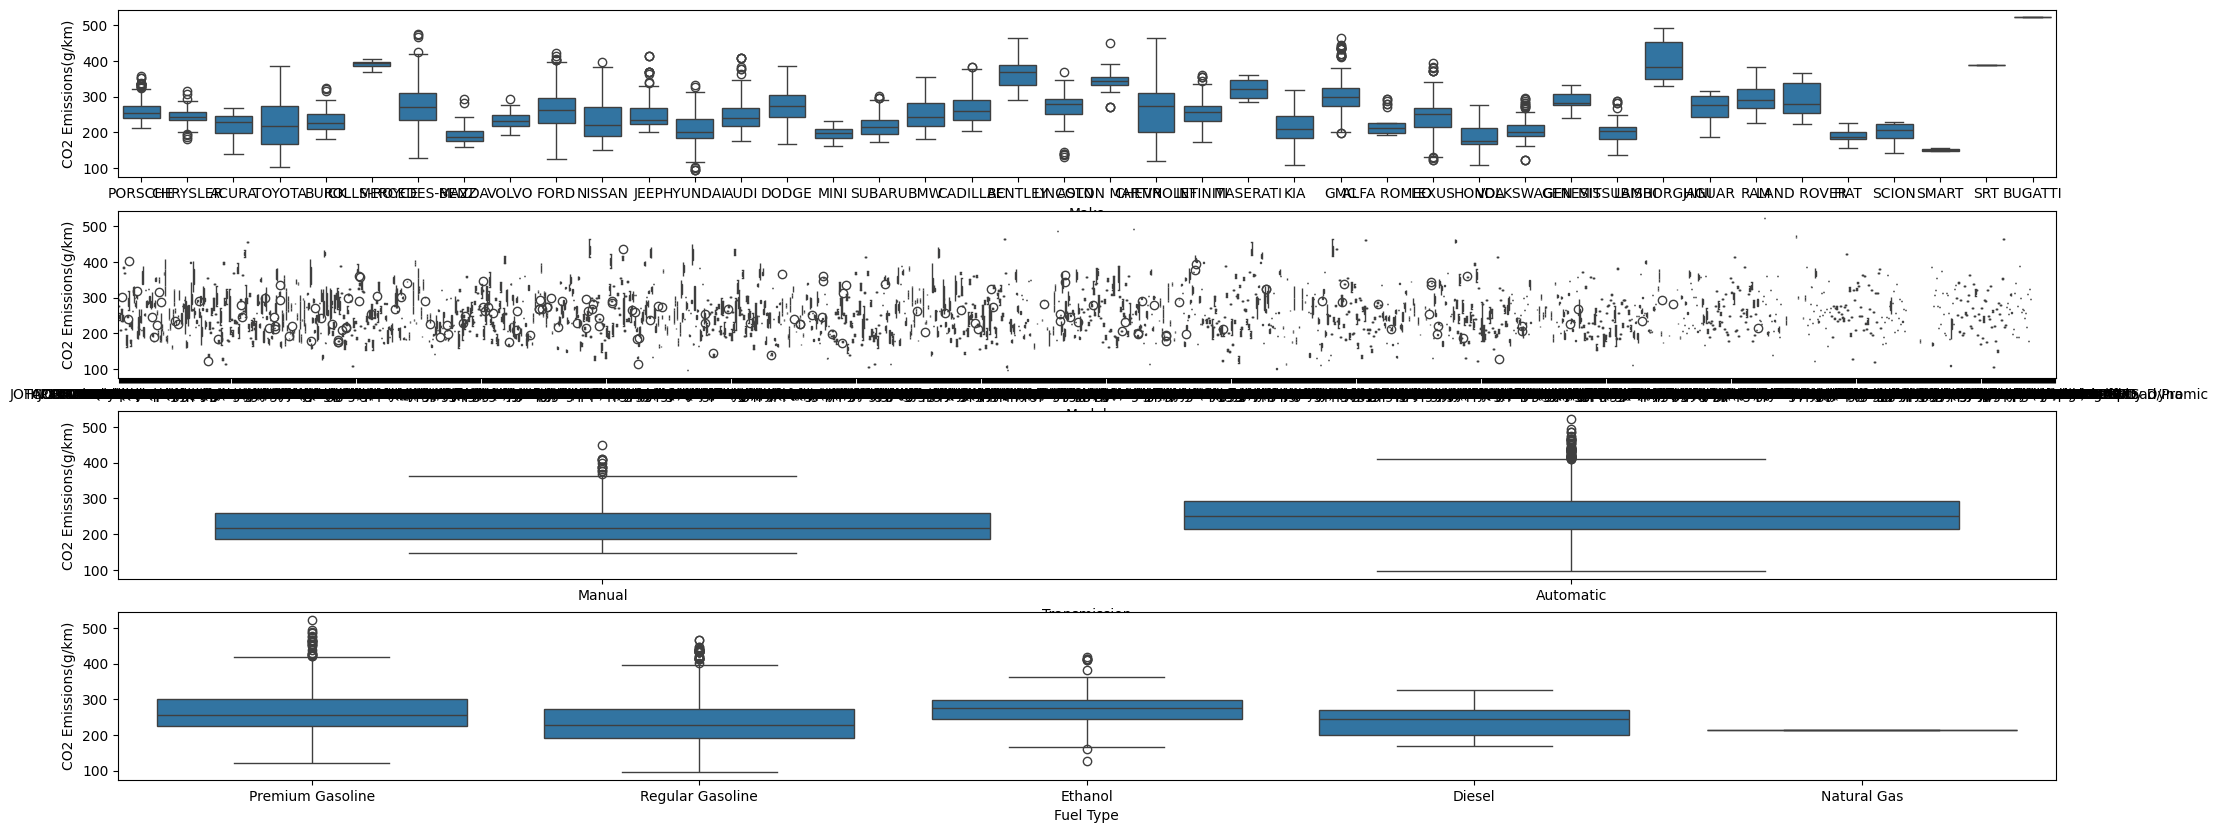

In [ ]:
plt.figure(figsize=(25, 10))
plt.subplot(4, 1, 1)
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 2)
sns.boxplot(x='Model', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 3)
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 4)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=train)
plt.show()

Vemos alta cardinalidad para la variable `Model` (segundo gráfico). Genera una dificl interpretación y problemas de eficiencia en el modelo.

In [ ]:
drop_fields = ['Model']

In [ ]:
train = train.drop(drop_fields, axis = 1)

Verificamos la correlación de las variables:

In [ ]:
train[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
3146             3.8          6                              13.3   
4639             3.6          6                              12.8   
5457             3.0          6                               9.1   
1003             4.0          6                              14.5   
5583             2.5          4                              11.1   
...              ...        ...                               ...   
5032             5.2         10                              17.2   
1378             3.6          6                              12.8   
757              5.5          8                              15.5   
2670             5.3          8                              15.0   
5725             3.6          6                              19.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
3146                             10.1                              11.8   
4639                              8.7                              11.0   
5457                              9.0                               9.0   
1003                             11.3                              13.1   
5583                              8.6                              10.0   
...                               ...                               ...   
5032                             12.3                              15.0   
1378                              8.1                              10.7   
757                              11.0                              13.5   
2670                             10.7                              13.1   
5725                             13.3                              16.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
3146                           24                  277  
4639                           26                  258  
5457                           31                  210  
1003                           22                  301  
5583                           28                  234  
...                           ...                  ...  
5032                           19                  350  
1378                           26                  246  
757                            21                  310  
2670                           22                  307  
5725                           17                  274  

[5908 rows x 7 columns]

In [ ]:
train.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

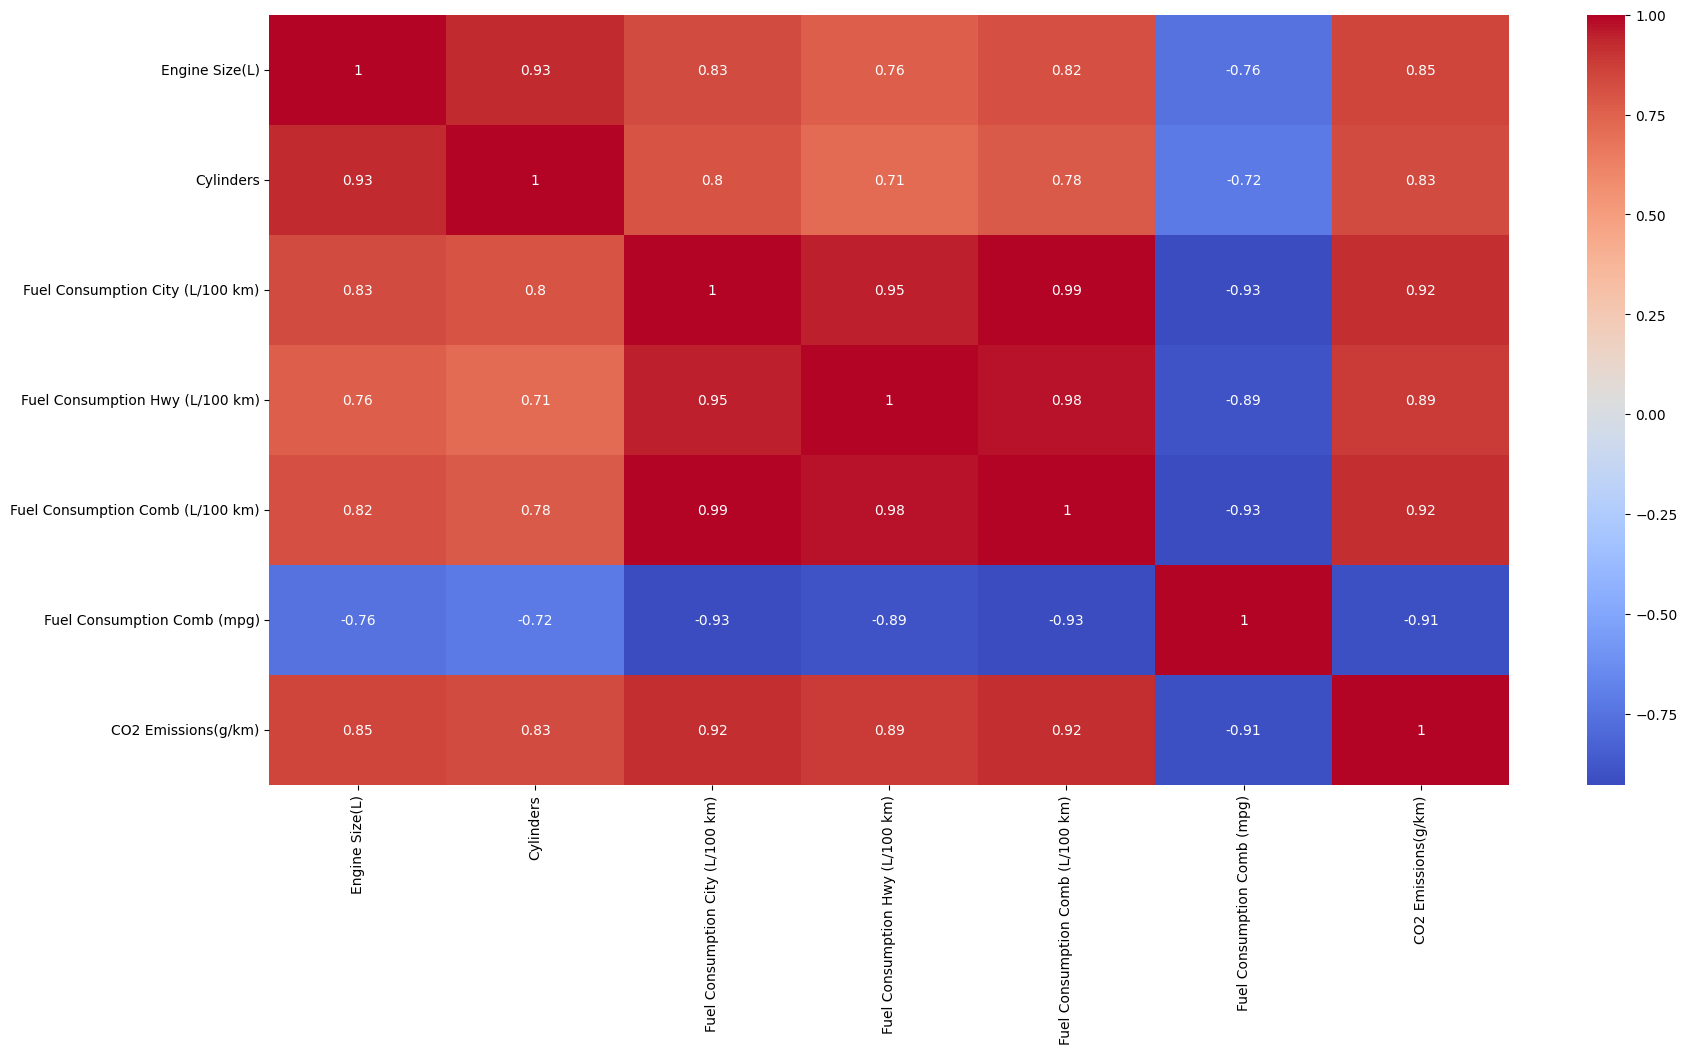

In [ ]:
numeric_data = train[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']].corr()
# Ahora genera el heatmap con los datos numéricos y sin los índices
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_data, annot=True, cmap="coolwarm")
plt.show()

## 1.3. Exploración profunda de información

Veamos una breve distribución de los datos usando pandas-profiling, una forma más sencilla pero poderosa para entender el contexto de nuestros datos

In [ ]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Insights:**

1. Numero considerable de autos AWD, 4WD, Coupe
2. Cerca del 17% de vehiculos pertenecen a SUV's pequeños
3. Bugatti Chiron es el auto que más gramos de CO2 produce por cada 100km
4. El auto menos eficiente en cuanto a consumo por 100km en ciudad es una Chevrolet Van-Passenger.

## 1.5. Preparación de los datos.

Teniendo en cuenta las recomendaciones anteriores, eliminamos duplicados

In [ ]:
# Eliminación de filas duplicadas
train = train.drop_duplicates()

Generamos una copia de la información:

In [ ]:
new_train = train.copy()

In [ ]:
new_train.head()

Make         Vehicle Class  Engine Size(L)  Cylinders Transmission  \
3146   PORSCHE            TWO-SEATER             3.8          6       Manual   
4639  CHRYSLER             FULL-SIZE             3.6          6    Automatic   
5457     ACURA           SUV - SMALL             3.0          6    Automatic   
1003    TOYOTA  PICKUP TRUCK - SMALL             4.0          6       Manual   
5583     BUICK           SUV - SMALL             2.5          4    Automatic   

             Fuel Type  Fuel Consumption City (L/100 km)  \
3146  Premium Gasoline                              13.3   
4639  Regular Gasoline                              12.8   
5457  Premium Gasoline                               9.1   
1003  Regular Gasoline                              14.5   
5583  Regular Gasoline                              11.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
3146                             10.1                              11.8   
4639                              8.7                              11.0   
5457                              9.0                               9.0   
1003                             11.3                              13.1   
5583                              8.6                              10.0   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
3146                           24                  277  
4639                           26                  258  
5457                           31                  210  
1003                           22                  301  
5583                           28                  234

Según lo propuesto por el negocio, nuestro objetivo será predecir las emisiones (Y) basado en sus características (X). Ya que entendimos que significa cada uno de nuestros atributos, realizaremos la separación de los datos

In [ ]:
target_feature = 'CO2 Emissions(g/km)'

In [ ]:
X_train, y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)
y_train

Make         Vehicle Class  Engine Size(L)  Cylinders  \
3146      PORSCHE            TWO-SEATER             3.8          6   
4639     CHRYSLER             FULL-SIZE             3.6          6   
5457        ACURA           SUV - SMALL             3.0          6   
1003       TOYOTA  PICKUP TRUCK - SMALL             4.0          6   
5583        BUICK           SUV - SMALL             2.5          4   
...           ...                   ...             ...        ...   
3743          GMC  PICKUP TRUCK - SMALL             2.5          4   
1354    CHEVROLET              MID-SIZE             1.8          4   
1043   VOLKSWAGEN               COMPACT             2.0          4   
5032  LAMBORGHINI            TWO-SEATER             5.2         10   
1378     CHRYSLER              MID-SIZE             3.6          6   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
3146       Manual  Premium Gasoline                              13.3   
4639    Automatic  Regular Gasoline                              12.8   
5457    Automatic  Premium Gasoline                               9.1   
1003       Manual  Regular Gasoline                              14.5   
5583    Automatic  Regular Gasoline                              11.1   
...           ...               ...                               ...   
3743    Automatic  Regular Gasoline                              12.7   
1354       Manual  Regular Gasoline                               9.0   
1043    Automatic            Diesel                               8.1   
5032    Automatic  Premium Gasoline                              17.2   
1378    Automatic  Regular Gasoline                              12.8   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
3146                             10.1                              11.8   
4639                              8.7                              11.0   
5457                              9.0                               9.0   
1003                             11.3                              13.1   
5583                              8.6                              10.0   
...                               ...                               ...   
3743                              9.6                              11.3   
1354                              6.8                               8.0   
1043                              6.4                               7.4   
5032                             12.3                              15.0   
1378                              8.1                              10.7   

      Fuel Consumption Comb (mpg)  
3146                           24  
4639                           26  
5457                           31  
1003                           22  
5583                           28  
...                           ...  
3743                           25  
1354                           35  
1043                           38  
5032                           19  
1378                           26  

[4359 rows x 10 columns]

3146    277
4639    258
5457    210
1003    301
5583    234
       ... 
3743    263
1354    184
1043    198
5032    350
1378    246
Name: CO2 Emissions(g/km), Length: 4359, dtype: int64

Debido a que nuestro algoritmo solo entiende números, y vemos que en nuestro conjunto $X$ hay variables categóricas, vamos a realizarles una transformación. En este caso, realizaremos un `OneHotEncoder` en vez de `LabelEncoder`.

[One Hot Encoding vs Label Encoding in Machine Learning](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

In [ ]:
cat_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cat_features])

enc.get_feature_names_out()

array(['Make_ACURA', 'Make_ALFA ROMEO', 'Make_ASTON MARTIN', 'Make_AUDI',
       'Make_BENTLEY', 'Make_BMW', 'Make_BUGATTI', 'Make_BUICK',
       'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FIAT', 'Make_FORD', 'Make_GENESIS', 'Make_GMC', 'Make_HONDA',
       'Make_HYUNDAI', 'Make_INFINITI', 'Make_JAGUAR', 'Make_JEEP',
       'Make_KIA', 'Make_LAMBORGHINI', 'Make_LAND ROVER', 'Make_LEXUS',
       'Make_LINCOLN', 'Make_MASERATI', 'Make_MAZDA',
       'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI',
       'Make_NISSAN', 'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE',
       'Make_SCION', 'Make_SMART', 'Make_SRT', 'Make_SUBARU',
       'Make_TOYOTA', 'Make_VOLKSWAGEN', 'Make_VOLVO',
       'Vehicle Class_COMPACT', 'Vehicle Class_FULL-SIZE',
       'Vehicle Class_MID-SIZE', 'Vehicle Class_MINICOMPACT',
       'Vehicle Class_MINIVAN', 'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PICKUP TRUCK - STANDARD',
       'Vehicle Class_SPECIAL PU

In [ ]:
num_features = list(set(X_train.columns) - set(cat_features))

X_trans = pd.DataFrame(enc.transform(X_train[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_train.index)
X_trans = pd.concat([X_trans, X_train[num_features]], axis=1)

X_trans

Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
3146         0.0              0.0                0.0        0.0           0.0   
4639         0.0              0.0                0.0        0.0           0.0   
5457         1.0              0.0                0.0        0.0           0.0   
1003         0.0              0.0                0.0        0.0           0.0   
5583         0.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
3743         0.0              0.0                0.0        0.0           0.0   
1354         0.0              0.0                0.0        0.0           0.0   
1043         0.0              0.0                0.0        0.0           0.0   
5032         0.0              0.0                0.0        0.0           0.0   
1378         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATTI  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  ...  \
3146       0.0           0.0         0.0            0.0             0.0  ...   
4639       0.0           0.0         0.0            0.0             0.0  ...   
5457       0.0           0.0         0.0            0.0             0.0  ...   
1003       0.0           0.0         0.0            0.0             0.0  ...   
5583       0.0           0.0         1.0            0.0             0.0  ...   
...        ...           ...         ...            ...             ...  ...   
3743       0.0           0.0         0.0            0.0             0.0  ...   
1354       0.0           0.0         0.0            0.0             1.0  ...   
1043       0.0           0.0         0.0            0.0             0.0  ...   
5032       0.0           0.0         0.0            0.0             0.0  ...   
1378       0.0           0.0         0.0            0.0             0.0  ...   

      Fuel Type_Ethanol  Fuel Type_Natural Gas  Fuel Type_Premium Gasoline  \
3146                0.0                    0.0                         1.0   
4639                0.0                    0.0                         0.0   
5457                0.0                    0.0                         1.0   
1003                0.0                    0.0                         0.0   
5583                0.0                    0.0                         0.0   
...                 ...                    ...                         ...   
3743                0.0                    0.0                         0.0   
1354                0.0                    0.0                         0.0   
1043                0.0                    0.0                         0.0   
5032                0.0                    0.0                         1.0   
1378                0.0                    0.0                         0.0   

      Fuel Type_Regular Gasoline  Fuel Consumption Hwy (L/100 km)  Cylinders  \
3146                         0.0                             10.1          6   
4639                         1.0                              8.7          6   
5457                         0.0                              9.0          6   
1003                         1.0                             11.3          6   
5583                         1.0                              8.6          4   
...                          ...                              ...        ...   
3743                         1.0                              9.6          4   
1354                         1.0                              6.8          4   
1043                         0.0                              6.4          4   
5032                         0.0                             12.3         10   
1378                         1.0                              8.1          6   

      Fuel Consumption City (L/100 km)  Engine Size(L)  \
3146                              13.3             3.8   
4639                              12.8             3.6   


Ya conforme con nuestra preparación de datos. Utilizaremos esta matriz para entrenar nuestro algoritmo.

In [ ]:
X_train = X_trans

In [ ]:
del X_trans

---
# 2. Modelamiento.

Ya con nuestros datos separados, realizaremos la etapa de entrenamiento de nuestro modelo. Para eso, utilizaremos la libreria de `scikit-learn`.

En `scikit-learn`, la mayoría de modelos integrados siguen la misma lógica:
1. Realizamos la inicialización del Modelo junto a los argumentos necesarios.
2. Llamamos al método `fit()` que recibe como parámetros las variables explicativas $X$ y la variabe predictora $Y$.
3. Podremos obtener nuestras predicciones del modelo llamando el método `transform()` y las variables explicativas que deseamos predecir.

Para cada tipo de modelo, se pueden encontrar diferentes métodos y atributos adicionales, como en el caso de la Regresión Lineal el `coef_` y el `intercept_`, para más información, pueden entrar a la página de [Scikit-Learn](https://scikit-learn.org/stable/).


## 2.1. Regresión lineal

**1. Preparación de los datos**

In [ ]:
X_train

Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
3146         0.0              0.0                0.0        0.0           0.0   
4639         0.0              0.0                0.0        0.0           0.0   
5457         1.0              0.0                0.0        0.0           0.0   
1003         0.0              0.0                0.0        0.0           0.0   
5583         0.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
3743         0.0              0.0                0.0        0.0           0.0   
1354         0.0              0.0                0.0        0.0           0.0   
1043         0.0              0.0                0.0        0.0           0.0   
5032         0.0              0.0                0.0        0.0           0.0   
1378         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATTI  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  ...  \
3146       0.0           0.0         0.0            0.0             0.0  ...   
4639       0.0           0.0         0.0            0.0             0.0  ...   
5457       0.0           0.0         0.0            0.0             0.0  ...   
1003       0.0           0.0         0.0            0.0             0.0  ...   
5583       0.0           0.0         1.0            0.0             0.0  ...   
...        ...           ...         ...            ...             ...  ...   
3743       0.0           0.0         0.0            0.0             0.0  ...   
1354       0.0           0.0         0.0            0.0             1.0  ...   
1043       0.0           0.0         0.0            0.0             0.0  ...   
5032       0.0           0.0         0.0            0.0             0.0  ...   
1378       0.0           0.0         0.0            0.0             0.0  ...   

      Fuel Type_Ethanol  Fuel Type_Natural Gas  Fuel Type_Premium Gasoline  \
3146                0.0                    0.0                         1.0   
4639                0.0                    0.0                         0.0   
5457                0.0                    0.0                         1.0   
1003                0.0                    0.0                         0.0   
5583                0.0                    0.0                         0.0   
...                 ...                    ...                         ...   
3743                0.0                    0.0                         0.0   
1354                0.0                    0.0                         0.0   
1043                0.0                    0.0                         0.0   
5032                0.0                    0.0                         1.0   
1378                0.0                    0.0                         0.0   

      Fuel Type_Regular Gasoline  Fuel Consumption Hwy (L/100 km)  Cylinders  \
3146                         0.0                             10.1          6   
4639                         1.0                              8.7          6   
5457                         0.0                              9.0          6   
1003                         1.0                             11.3          6   
5583                         1.0                              8.6          4   
...                          ...                              ...        ...   
3743                         1.0                              9.6          4   
1354                         1.0                              6.8          4   
1043                         0.0                              6.4          4   
5032                         0.0                             12.3         10   
1378                         1.0                              8.1          6   

      Fuel Consumption City (L/100 km)  Engine Size(L)  \
3146                              13.3             3.8   
4639                              12.8             3.6   


**2. Implementación**

In [ ]:
LinearModel1 = LinearRegression()
LinearModel1.fit(X_train, y_train)
print('Coefficients: ', LinearModel1.coef_)
print('Intercept: ', LinearModel1.intercept_)

Coefficients:  [-3.99480409e+00 -8.13495981e-01  1.61524788e+00 -2.27867390e+00
  4.59784718e+00 -2.69424328e+00  2.25007070e+01 -9.70130042e-01
 -2.04215975e+00 -5.55396433e-01  3.31948968e+00  8.53949389e-01
 -8.00132672e-01  1.31282980e+00  1.99514891e+00 -1.30444914e+00
 -1.04438609e+00  8.25609142e-03 -2.60015374e+00 -2.20272537e+00
  8.34389390e-01 -1.71437121e-01  5.63747795e+00 -2.08825998e+00
 -2.97443847e+00  2.55389130e-01  2.80122000e+00 -1.85513385e+00
 -1.82147426e+00 -2.22732173e+00 -2.31247071e+00 -1.00414795e+00
 -2.23844858e+00  2.27519931e-01  4.28183519e+00 -2.80047900e+00
 -3.42494210e+00  1.42711616e+00 -2.08332654e+00 -5.92674423e-01
 -2.20089557e+00 -2.57222286e+00  7.02812399e-01  1.14870659e+00
  3.86922488e-01 -7.14040657e-01  9.74988625e-02  3.28498205e+00
  1.46306114e+00  1.94944298e+00  2.38475338e-01  1.71239706e-01
  1.13924057e-02  4.12453661e-01  1.94509974e+00  9.04553213e-01
 -1.14594292e+01 -5.43170755e-01  1.71120305e-01 -1.71120305e-01
  6.116429

In [ ]:
coef2 = dict(zip(X_train.columns, LinearModel1.coef_))
for k,v in coef2.items():
    print(f'{k} = {v:,.2f}')

Make_ACURA = -3.99
Make_ALFA ROMEO = -0.81
Make_ASTON MARTIN = 1.62
Make_AUDI = -2.28
Make_BENTLEY = 4.60
Make_BMW = -2.69
Make_BUGATTI = 22.50
Make_BUICK = -0.97
Make_CADILLAC = -2.04
Make_CHEVROLET = -0.56
Make_CHRYSLER = 3.32
Make_DODGE = 0.85
Make_FIAT = -0.80
Make_FORD = 1.31
Make_GENESIS = 2.00
Make_GMC = -1.30
Make_HONDA = -1.04
Make_HYUNDAI = 0.01
Make_INFINITI = -2.60
Make_JAGUAR = -2.20
Make_JEEP = 0.83
Make_KIA = -0.17
Make_LAMBORGHINI = 5.64
Make_LAND ROVER = -2.09
Make_LEXUS = -2.97
Make_LINCOLN = 0.26
Make_MASERATI = 2.80
Make_MAZDA = -1.86
Make_MERCEDES-BENZ = -1.82
Make_MINI = -2.23
Make_MITSUBISHI = -2.31
Make_NISSAN = -1.00
Make_PORSCHE = -2.24
Make_RAM = 0.23
Make_ROLLS-ROYCE = 4.28
Make_SCION = -2.80
Make_SMART = -3.42
Make_SRT = 1.43
Make_SUBARU = -2.08
Make_TOYOTA = -0.59
Make_VOLKSWAGEN = -2.20
Make_VOLVO = -2.57
Vehicle Class_COMPACT = 0.70
Vehicle Class_FULL-SIZE = 1.15
Vehicle Class_MID-SIZE = 0.39
Vehicle Class_MINICOMPACT = -0.71
Vehicle Class_MINIVAN = 0.10

**3. Evaluación**

In [ ]:
y_pred1 = LinearModel1.predict(X_train)
y_pred1

array([275.35705757, 261.15577149, 212.4045027 , ..., 201.59717829,
       353.67734278, 254.68379129])

In [ ]:
n,p = X_train.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred1))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train,y_pred1) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred1) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred1))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 25.31
Root of sum of squares (RMSE): 5.03
R2-score: 0.99291
Adj R2-score: 0.99279


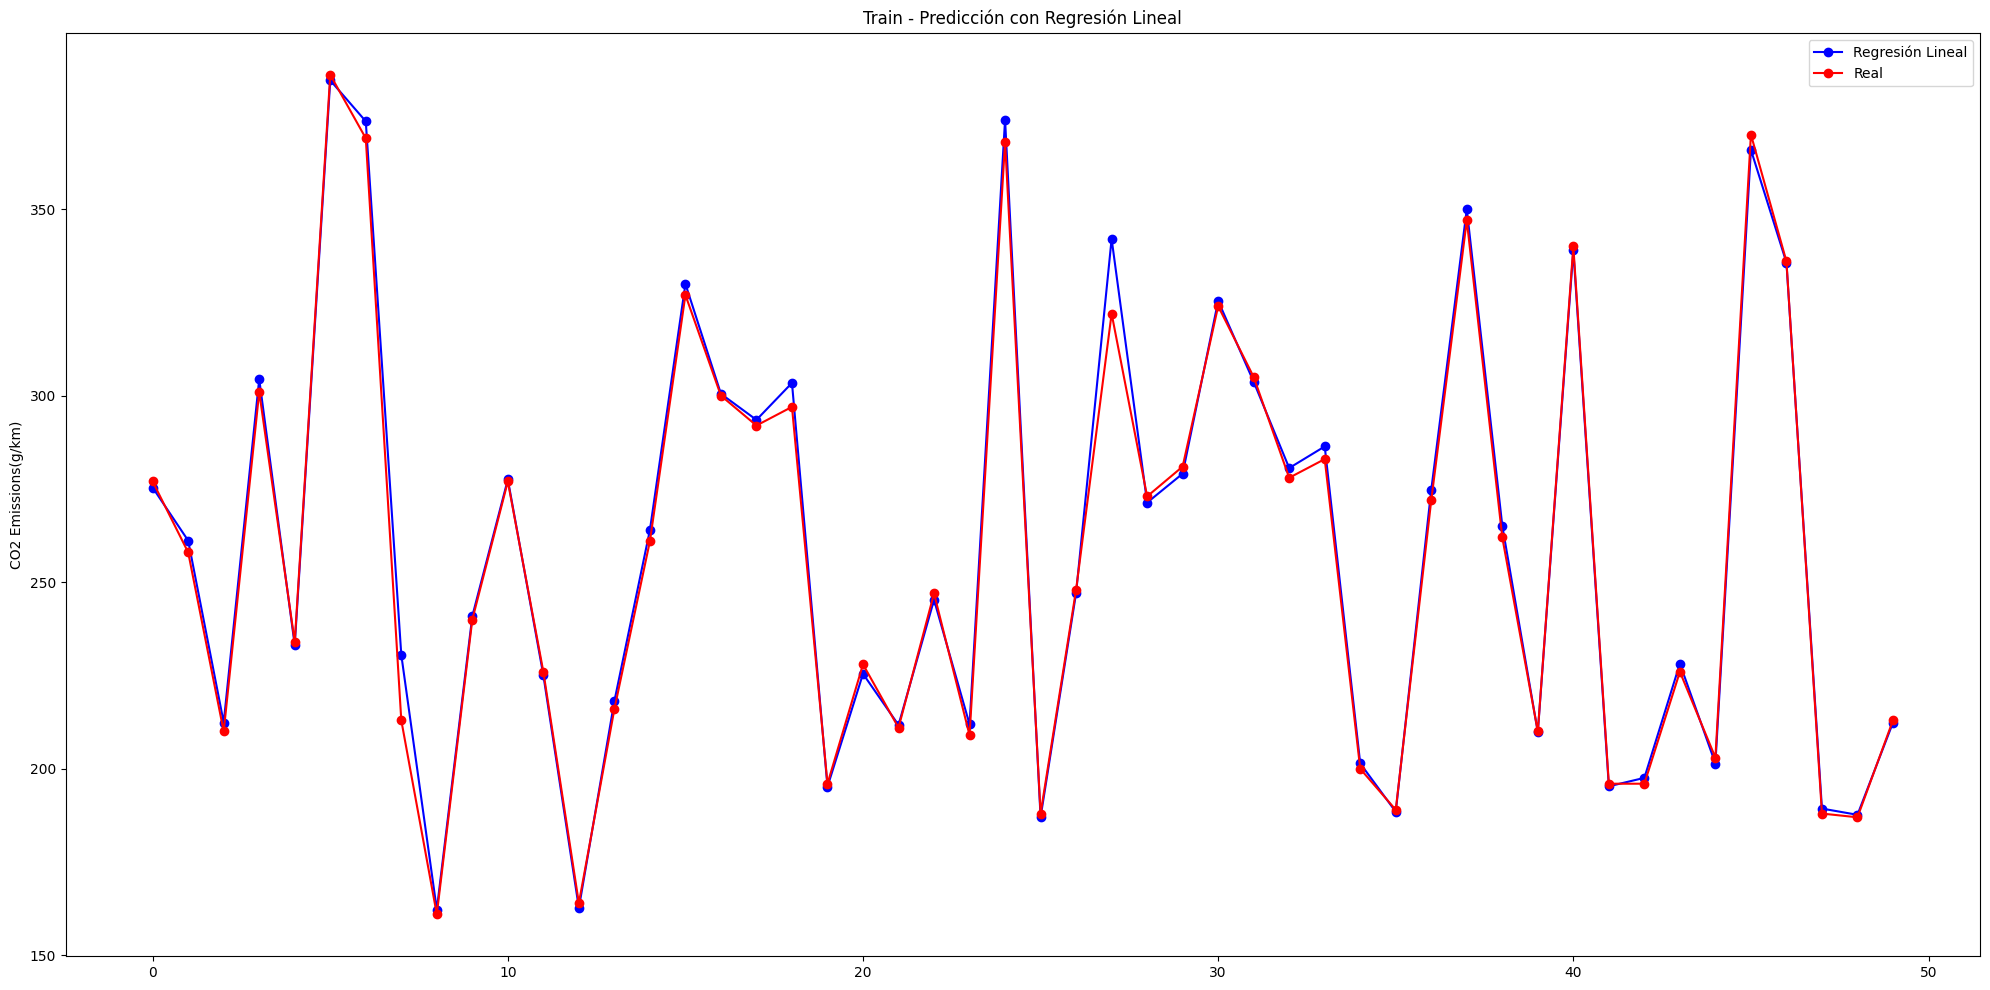

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred1[:50],'bo-', label='Regresión Lineal')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Train - Predicción con Regresión Lineal',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

**4. Probar con datos desconocidos**

In [ ]:
test

Make                             Model  \
1481           FORD                         FIESTA ST   
4695           FORD                              EDGE   
5399         TOYOTA                       SEQUOIA 4WD   
4504            BMW                      X5 xDRIVE50i   
933     ROLLS-ROYCE                            WRAITH   
...             ...                               ...   
5545            BMW  M240i xDrive Coupe M Performance   
4689           FIAT                          500X AWD   
4326     VOLKSWAGEN                BEETLE CONVERTIBLE   
5160  MERCEDES-BENZ                E 400 4MATIC WAGON   
2770       INFINITI                          QX60 AWD   

                 Vehicle Class  Engine Size(L)  Cylinders Transmission  \
1481                SUBCOMPACT             1.6          4           M6   
4695               SUV - SMALL             3.5          6          AS6   
5399            SUV - STANDARD             5.7          8          AS6   
4504            SUV - STANDARD             4.4          8          AS8   
933                   MID-SIZE             6.6         12           A8   
...                        ...             ...        ...          ...   
5545                SUBCOMPACT             3.0          6          AS8   
4689               SUV - SMALL             2.4          4           A9   
4326                SUBCOMPACT             1.8          4          AS6   
5160  STATION WAGON - MID-SIZE             3.0          6           A9   
2770               SUV - SMALL             3.5          6          AV7   

     Fuel Type  Fuel Consumption City (L/100 km)  \
1481         X                               8.9   
4695         X                              13.5   
5399         X                              18.4   
4504         Z                              15.4   
933          Z                              18.7   
...        ...                               ...   
5545         Z                              11.3   
4689         X                              11.0   
4326         X                               9.7   
5160         Z                              12.4   
2770         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1481                           35                  184  
4695                           25                  270  
5399                           17                  384  
4504                           21                  317  
933                            18                  359  
...                           ...                  ...  
5545                           29                  229  
4689                           29                  226  
4326                           33                  199  
5160                           25                  261  
2770                           26                  252  

[1477 rows x 12 columns]

In [ ]:
# Estandarizacion tipo de transmisión
test['Transmission'] = test['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

# Estandarización tipo de combustible
test['Fuel Type'] = test['Fuel Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

In [ ]:
new_test1 = test.copy()
new_test1 = new_test1.drop(drop_fields, axis=1)
new_test1 = new_test1.drop_duplicates()
new_test1

Make             Vehicle Class  Engine Size(L)  Cylinders  \
1481           FORD                SUBCOMPACT             1.6          4   
4695           FORD               SUV - SMALL             3.5          6   
5399         TOYOTA            SUV - STANDARD             5.7          8   
4504            BMW            SUV - STANDARD             4.4          8   
933     ROLLS-ROYCE                  MID-SIZE             6.6         12   
...             ...                       ...             ...        ...   
5545            BMW                SUBCOMPACT             3.0          6   
4689           FIAT               SUV - SMALL             2.4          4   
4326     VOLKSWAGEN                SUBCOMPACT             1.8          4   
5160  MERCEDES-BENZ  STATION WAGON - MID-SIZE             3.0          6   
2770       INFINITI               SUV - SMALL             3.5          6   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
1481       Manual  Regular Gasoline                               8.9   
4695    Automatic  Regular Gasoline                              13.5   
5399    Automatic  Regular Gasoline                              18.4   
4504    Automatic  Premium Gasoline                              15.4   
933     Automatic  Premium Gasoline                              18.7   
...           ...               ...                               ...   
5545    Automatic  Premium Gasoline                              11.3   
4689    Automatic  Regular Gasoline                              11.0   
4326    Automatic  Regular Gasoline                               9.7   
5160    Automatic  Premium Gasoline                              12.4   
2770    Automatic  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1481                           35                  184  
4695                           25                  270  
5399                           17                  384  
4504                           21                  317  
933                            18                  359  
...                           ...                  ...  
5545                           29                  229  
4689                           29                  226  
4326                           33                  199  
5160                           25                  261  
2770                           26                  252  

[1363 rows x 11 columns]

In [ ]:
X_test, y_test = new_test1.drop([target_feature],axis=1), new_test1[target_feature]
display(X_test)
y_test

Make             Vehicle Class  Engine Size(L)  Cylinders  \
1481           FORD                SUBCOMPACT             1.6          4   
4695           FORD               SUV - SMALL             3.5          6   
5399         TOYOTA            SUV - STANDARD             5.7          8   
4504            BMW            SUV - STANDARD             4.4          8   
933     ROLLS-ROYCE                  MID-SIZE             6.6         12   
...             ...                       ...             ...        ...   
5545            BMW                SUBCOMPACT             3.0          6   
4689           FIAT               SUV - SMALL             2.4          4   
4326     VOLKSWAGEN                SUBCOMPACT             1.8          4   
5160  MERCEDES-BENZ  STATION WAGON - MID-SIZE             3.0          6   
2770       INFINITI               SUV - SMALL             3.5          6   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
1481       Manual  Regular Gasoline                               8.9   
4695    Automatic  Regular Gasoline                              13.5   
5399    Automatic  Regular Gasoline                              18.4   
4504    Automatic  Premium Gasoline                              15.4   
933     Automatic  Premium Gasoline                              18.7   
...           ...               ...                               ...   
5545    Automatic  Premium Gasoline                              11.3   
4689    Automatic  Regular Gasoline                              11.0   
4326    Automatic  Regular Gasoline                               9.7   
5160    Automatic  Premium Gasoline                              12.4   
2770    Automatic  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  
1481                           35  
4695                           25  
5399                           17  
4504                           21  
933                            18  
...                           ...  
5545                           29  
4689                           29  
4326                           33  
5160                           25  
2770                           26  

[1363 rows x 10 columns]

1481    184
4695    270
5399    384
4504    317
933     359
       ... 
5545    229
4689    226
4326    199
5160    261
2770    252
Name: CO2 Emissions(g/km), Length: 1363, dtype: int64

In [ ]:
# Aplicamos One hot Encoder a nuestro set de test
X_trans = pd.DataFrame(enc.transform(X_test[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat([X_trans, X_test[num_features]], axis=1)

X_test

Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
1481         0.0              0.0                0.0        0.0           0.0   
4695         0.0              0.0                0.0        0.0           0.0   
5399         0.0              0.0                0.0        0.0           0.0   
4504         0.0              0.0                0.0        0.0           0.0   
933          0.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
5545         0.0              0.0                0.0        0.0           0.0   
4689         0.0              0.0                0.0        0.0           0.0   
4326         0.0              0.0                0.0        0.0           0.0   
5160         0.0              0.0                0.0        0.0           0.0   
2770         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATTI  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  ...  \
1481       0.0           0.0         0.0            0.0             0.0  ...   
4695       0.0           0.0         0.0            0.0             0.0  ...   
5399       0.0           0.0         0.0            0.0             0.0  ...   
4504       1.0           0.0         0.0            0.0             0.0  ...   
933        0.0           0.0         0.0            0.0             0.0  ...   
...        ...           ...         ...            ...             ...  ...   
5545       1.0           0.0         0.0            0.0             0.0  ...   
4689       0.0           0.0         0.0            0.0             0.0  ...   
4326       0.0           0.0         0.0            0.0             0.0  ...   
5160       0.0           0.0         0.0            0.0             0.0  ...   
2770       0.0           0.0         0.0            0.0             0.0  ...   

      Fuel Type_Ethanol  Fuel Type_Natural Gas  Fuel Type_Premium Gasoline  \
1481                0.0                    0.0                         0.0   
4695                0.0                    0.0                         0.0   
5399                0.0                    0.0                         0.0   
4504                0.0                    0.0                         1.0   
933                 0.0                    0.0                         1.0   
...                 ...                    ...                         ...   
5545                0.0                    0.0                         1.0   
4689                0.0                    0.0                         0.0   
4326                0.0                    0.0                         0.0   
5160                0.0                    0.0                         1.0   
2770                0.0                    0.0                         1.0   

      Fuel Type_Regular Gasoline  Fuel Consumption Hwy (L/100 km)  Cylinders  \
1481                         1.0                              6.8          4   
4695                         1.0                              9.1          6   
5399                         1.0                             13.8          8   
4504                         0.0                             11.2          8   
933                          0.0                             11.8         12   
...                          ...                              ...        ...   
5545                         0.0                              8.0          6   
4689                         1.0                              8.0          4   
4326                         1.0                              7.2          4   
5160                         0.0                              9.5          6   
2770                         0.0                              8.9          6   

      Fuel Consumption City (L/100 km)  Engine Size(L)  \
1481                               8.9             1.6   
4695                              13.5             3.5   


In [ ]:
y_pred_test1 = LinearModel1.predict(X_test)
y_pred_test1

array([188.25272104, 269.69022992, 374.56852083, ..., 198.05648714,
       259.72427916, 250.75028266])

In [ ]:
n,p = X_test.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test1))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test1) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test1) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test1))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 22.64
Root of sum of squares (RMSE): 4.76
R2-score: 0.99285
Adj R2-score: 0.99246


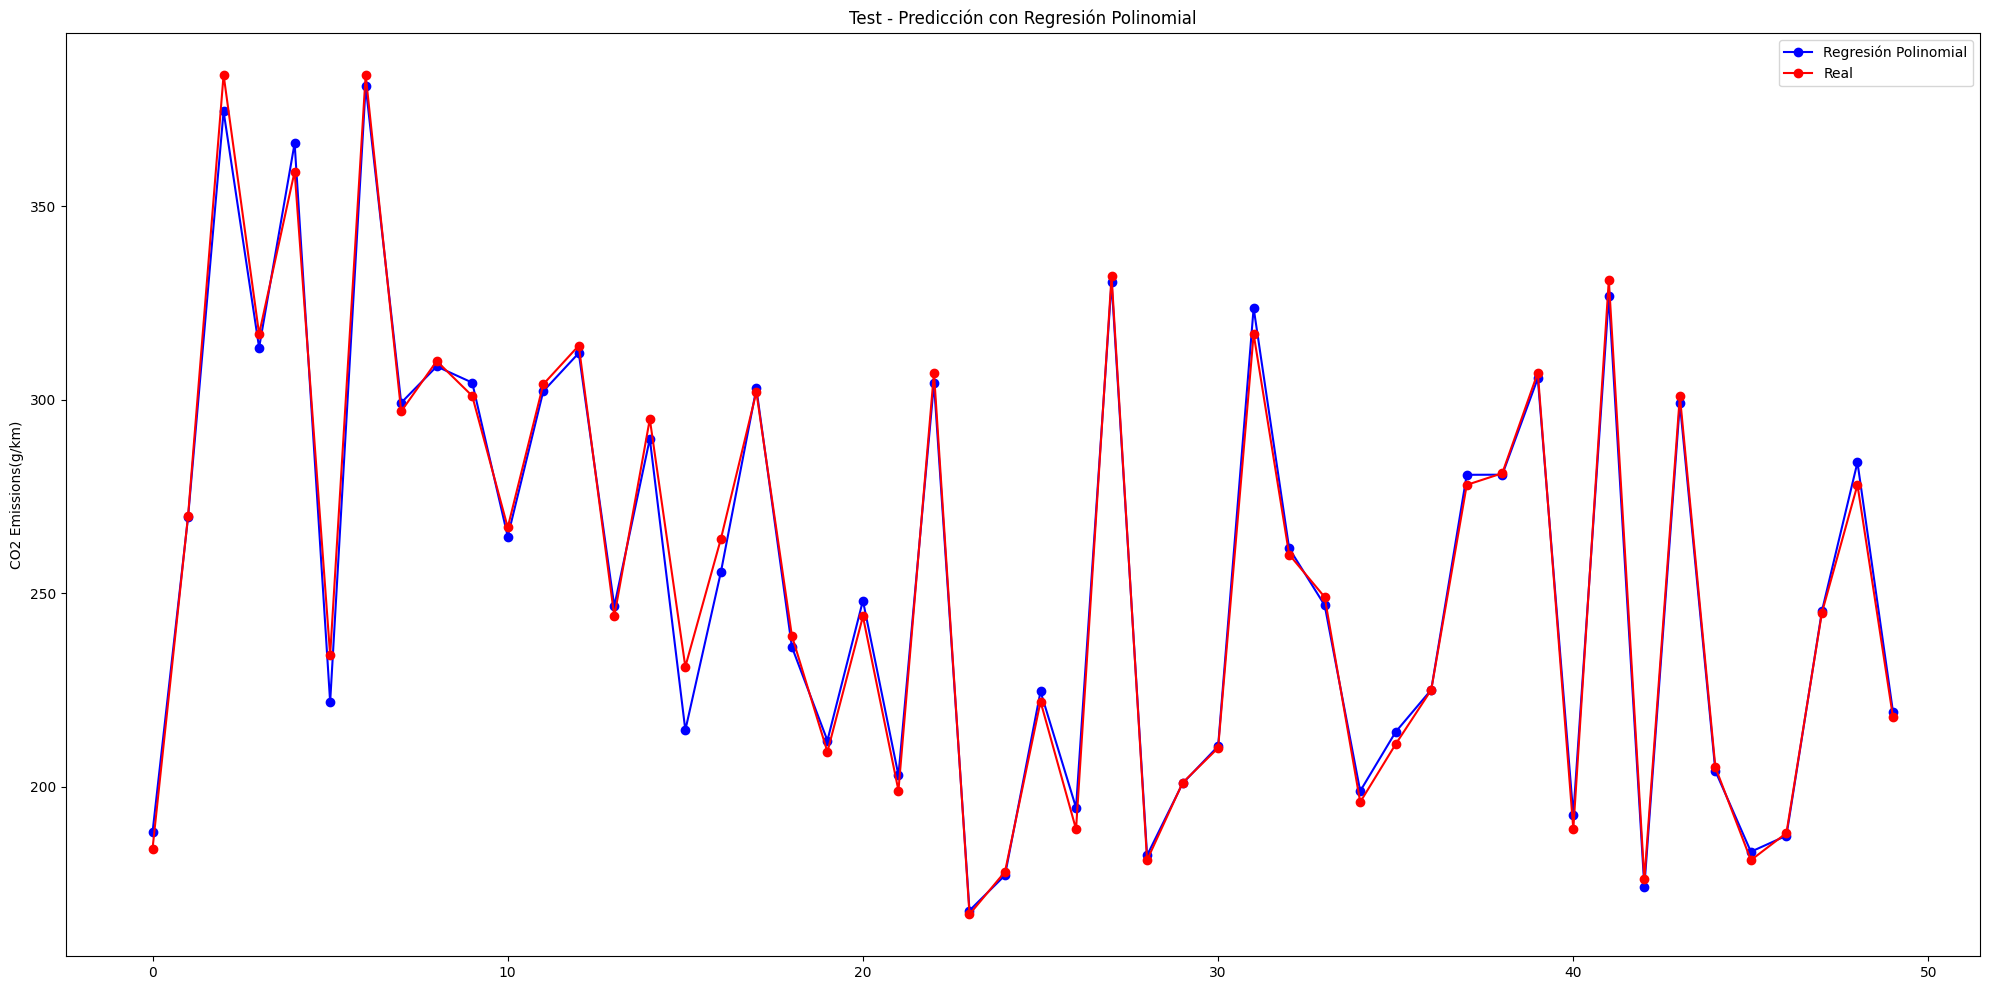

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_test1[:50],'bo-', label='Regresión Polinomial')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Test - Predicción con Regresión Polinomial',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

## 2.2. Regresión lineal + StandardScaler()

In [ ]:
X_train

Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
3146         0.0              0.0                0.0        0.0           0.0   
4639         0.0              0.0                0.0        0.0           0.0   
5457         1.0              0.0                0.0        0.0           0.0   
1003         0.0              0.0                0.0        0.0           0.0   
5583         0.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
3743         0.0              0.0                0.0        0.0           0.0   
1354         0.0              0.0                0.0        0.0           0.0   
1043         0.0              0.0                0.0        0.0           0.0   
5032         0.0              0.0                0.0        0.0           0.0   
1378         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATTI  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  ...  \
3146       0.0           0.0         0.0            0.0             0.0  ...   
4639       0.0           0.0         0.0            0.0             0.0  ...   
5457       0.0           0.0         0.0            0.0             0.0  ...   
1003       0.0           0.0         0.0            0.0             0.0  ...   
5583       0.0           0.0         1.0            0.0             0.0  ...   
...        ...           ...         ...            ...             ...  ...   
3743       0.0           0.0         0.0            0.0             0.0  ...   
1354       0.0           0.0         0.0            0.0             1.0  ...   
1043       0.0           0.0         0.0            0.0             0.0  ...   
5032       0.0           0.0         0.0            0.0             0.0  ...   
1378       0.0           0.0         0.0            0.0             0.0  ...   

      Fuel Type_Ethanol  Fuel Type_Natural Gas  Fuel Type_Premium Gasoline  \
3146                0.0                    0.0                         1.0   
4639                0.0                    0.0                         0.0   
5457                0.0                    0.0                         1.0   
1003                0.0                    0.0                         0.0   
5583                0.0                    0.0                         0.0   
...                 ...                    ...                         ...   
3743                0.0                    0.0                         0.0   
1354                0.0                    0.0                         0.0   
1043                0.0                    0.0                         0.0   
5032                0.0                    0.0                         1.0   
1378                0.0                    0.0                         0.0   

      Fuel Type_Regular Gasoline  Fuel Consumption Hwy (L/100 km)  Cylinders  \
3146                         0.0                             10.1          6   
4639                         1.0                              8.7          6   
5457                         0.0                              9.0          6   
1003                         1.0                             11.3          6   
5583                         1.0                              8.6          4   
...                          ...                              ...        ...   
3743                         1.0                              9.6          4   
1354                         1.0                              6.8          4   
1043                         0.0                              6.4          4   
5032                         0.0                             12.3         10   
1378                         1.0                              8.1          6   

      Fuel Consumption City (L/100 km)  Engine Size(L)  \
3146                              13.3             3.8   
4639                              12.8             3.6   


In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train[num_features])
X_train_norm = pd.DataFrame(X_train_norm, columns=num_features, index=X_train.index)

# Seleccionar solo las columnas no numéricas de X_train
non_num_features = list(set(X_train.columns) - set(num_features))
X_train_non_num = X_train[non_num_features]

# Concatenar las columnas no numéricas con las numéricas normalizadas
X_train_final = pd.concat([X_train_non_num, X_train_norm], axis=1)

X_train_norm = X_train_final
X_train_norm

Make_FORD  Make_VOLVO  Make_LINCOLN  Transmission_Automatic  Make_MAZDA  \
3146        0.0         0.0           0.0                     0.0         0.0   
4639        0.0         0.0           0.0                     1.0         0.0   
5457        0.0         0.0           0.0                     1.0         0.0   
1003        0.0         0.0           0.0                     0.0         0.0   
5583        0.0         0.0           0.0                     1.0         0.0   
...         ...         ...           ...                     ...         ...   
3743        0.0         0.0           0.0                     1.0         0.0   
1354        0.0         0.0           0.0                     0.0         0.0   
1043        0.0         0.0           0.0                     1.0         0.0   
5032        0.0         0.0           0.0                     1.0         0.0   
1378        0.0         0.0           0.0                     1.0         0.0   

      Make_GENESIS  Make_FIAT  Vehicle Class_STATION WAGON - MID-SIZE  \
3146           0.0        0.0                                     0.0   
4639           0.0        0.0                                     0.0   
5457           0.0        0.0                                     0.0   
1003           0.0        0.0                                     0.0   
5583           0.0        0.0                                     0.0   
...            ...        ...                                     ...   
3743           0.0        0.0                                     0.0   
1354           0.0        0.0                                     0.0   
1043           0.0        0.0                                     0.0   
5032           0.0        0.0                                     0.0   
1378           0.0        0.0                                     0.0   

      Make_MASERATI  Vehicle Class_SPECIAL PURPOSE VEHICLE  ...  Make_SMART  \
3146            0.0                                    0.0  ...         0.0   
4639            0.0                                    0.0  ...         0.0   
5457            0.0                                    0.0  ...         0.0   
1003            0.0                                    0.0  ...         0.0   
5583            0.0                                    0.0  ...         0.0   
...             ...                                    ...  ...         ...   
3743            0.0                                    0.0  ...         0.0   
1354            0.0                                    0.0  ...         0.0   
1043            0.0                                    0.0  ...         0.0   
5032            0.0                                    0.0  ...         0.0   
1378            0.0                                    0.0  ...         0.0   

      Vehicle Class_VAN - PASSENGER  Make_HYUNDAI  Make_NISSAN  \
3146                            0.0           0.0          0.0   
4639                            0.0           0.0          0.0   
5457                            0.0           0.0          0.0   
1003                            0.0           0.0          0.0   
5583                            0.0           0.0          0.0   
...                             ...           ...          ...   
3743                            0.0           0.0          0.0   
1354                            0.0           0.0          0.0   
1043                            0.0           0.0          0.0   
5032                            0.0           0.0          0.0   
1378                            0.0           0.0          0.0   

      Fuel Consumption Hwy (L/100 km)  Cylinders  \
3146                         0.454226   0.244650   
4639                        -0.150056   0.244650   
5457                        -0.020567   0.244650   
1003                         0.972182   0.244650   
5583                        -0.193219  -0.855329   
...                               ...        ...   
3743                         0.238411  -0.855329  

**2. Implementación**

In [ ]:
LinearModel2 = LinearRegression()
LinearModel2.fit(X_train_norm, y_train)
print('Coefficients: ', LinearModel2.coef_)
print('Intercept: ', LinearModel2.intercept_)

Coefficients:  [ 1.31282980e+00 -2.57222286e+00  2.55389130e-01  1.71120305e-01
 -1.85513385e+00  1.99514891e+00 -8.00132672e-01  2.38475338e-01
  2.80122000e+00  1.94944298e+00 -2.31247071e+00 -2.08825998e+00
  6.11642968e+01  3.28498205e+00 -2.08332654e+00 -1.14594292e+01
 -5.55396433e-01 -2.20089557e+00  2.27519931e-01 -9.70130042e-01
 -1.04438609e+00 -7.52498566e+01 -2.60015374e+00 -1.82147426e+00
  9.74988625e-02 -1.71437121e-01 -5.92674423e-01 -3.99480409e+00
 -2.22732173e+00 -1.71120305e-01  3.08903572e+01 -2.20272537e+00
  3.21900078e+01  4.28183519e+00  1.46306114e+00  1.13924057e-02
  1.94509974e+00 -2.04215975e+00 -7.14040657e-01  1.14870659e+00
  4.12453661e-01  3.86922488e-01  5.63747795e+00  8.53949389e-01
 -2.23844858e+00  1.61524788e+00  9.04553213e-01 -2.80047900e+00
 -8.13495981e-01  2.25007070e+01  4.59784718e+00 -2.97443847e+00
 -2.27867390e+00 -2.69424328e+00  3.31948968e+00 -4.89948053e+01
  8.34389390e-01  1.71239706e-01  1.42711616e+00  7.02812399e-01
 -1.304449

In [ ]:
coef2 = dict(zip(X_train_norm.columns, LinearModel2.coef_))
for k,v in coef2.items():
    print(f'{k} = {v:,.2f}')

Make_FORD = 1.31
Make_VOLVO = -2.57
Make_LINCOLN = 0.26
Transmission_Automatic = 0.17
Make_MAZDA = -1.86
Make_GENESIS = 2.00
Make_FIAT = -0.80
Vehicle Class_STATION WAGON - MID-SIZE = 0.24
Make_MASERATI = 2.80
Vehicle Class_SPECIAL PURPOSE VEHICLE = 1.95
Make_MITSUBISHI = -2.31
Make_LAND ROVER = -2.09
Fuel Type_Diesel = 61.16
Vehicle Class_PICKUP TRUCK - SMALL = 3.28
Make_SUBARU = -2.08
Vehicle Class_VAN - CARGO = -11.46
Make_CHEVROLET = -0.56
Make_VOLKSWAGEN = -2.20
Make_RAM = 0.23
Make_BUICK = -0.97
Make_HONDA = -1.04
Fuel Type_Ethanol = -75.25
Make_INFINITI = -2.60
Make_MERCEDES-BENZ = -1.82
Vehicle Class_MINIVAN = 0.10
Make_KIA = -0.17
Make_TOYOTA = -0.59
Make_ACURA = -3.99
Make_MINI = -2.23
Transmission_Manual = -0.17
Fuel Type_Regular Gasoline = 30.89
Make_JAGUAR = -2.20
Fuel Type_Premium Gasoline = 32.19
Make_ROLLS-ROYCE = 4.28
Vehicle Class_PICKUP TRUCK - STANDARD = 1.46
Vehicle Class_SUBCOMPACT = 0.01
Vehicle Class_SUV - STANDARD = 1.95
Make_CADILLAC = -2.04
Vehicle Class_MINI

**3. Evaluación**

In [ ]:
y_pred2 = LinearModel2.predict(X_train_norm)
y_pred2

array([275.35705757, 261.15577149, 212.4045027 , ..., 201.59717829,
       353.67734278, 254.68379129])

In [ ]:
n,p = X_train_norm.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred2))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train,y_pred2) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred2) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred2))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 25.31
Root of sum of squares (RMSE): 5.03
R2-score: 0.99291
Adj R2-score: 0.99279


Y realizaremos una gráfica para ver como es el comportamiento de los datos reales vs los datos predecidos.

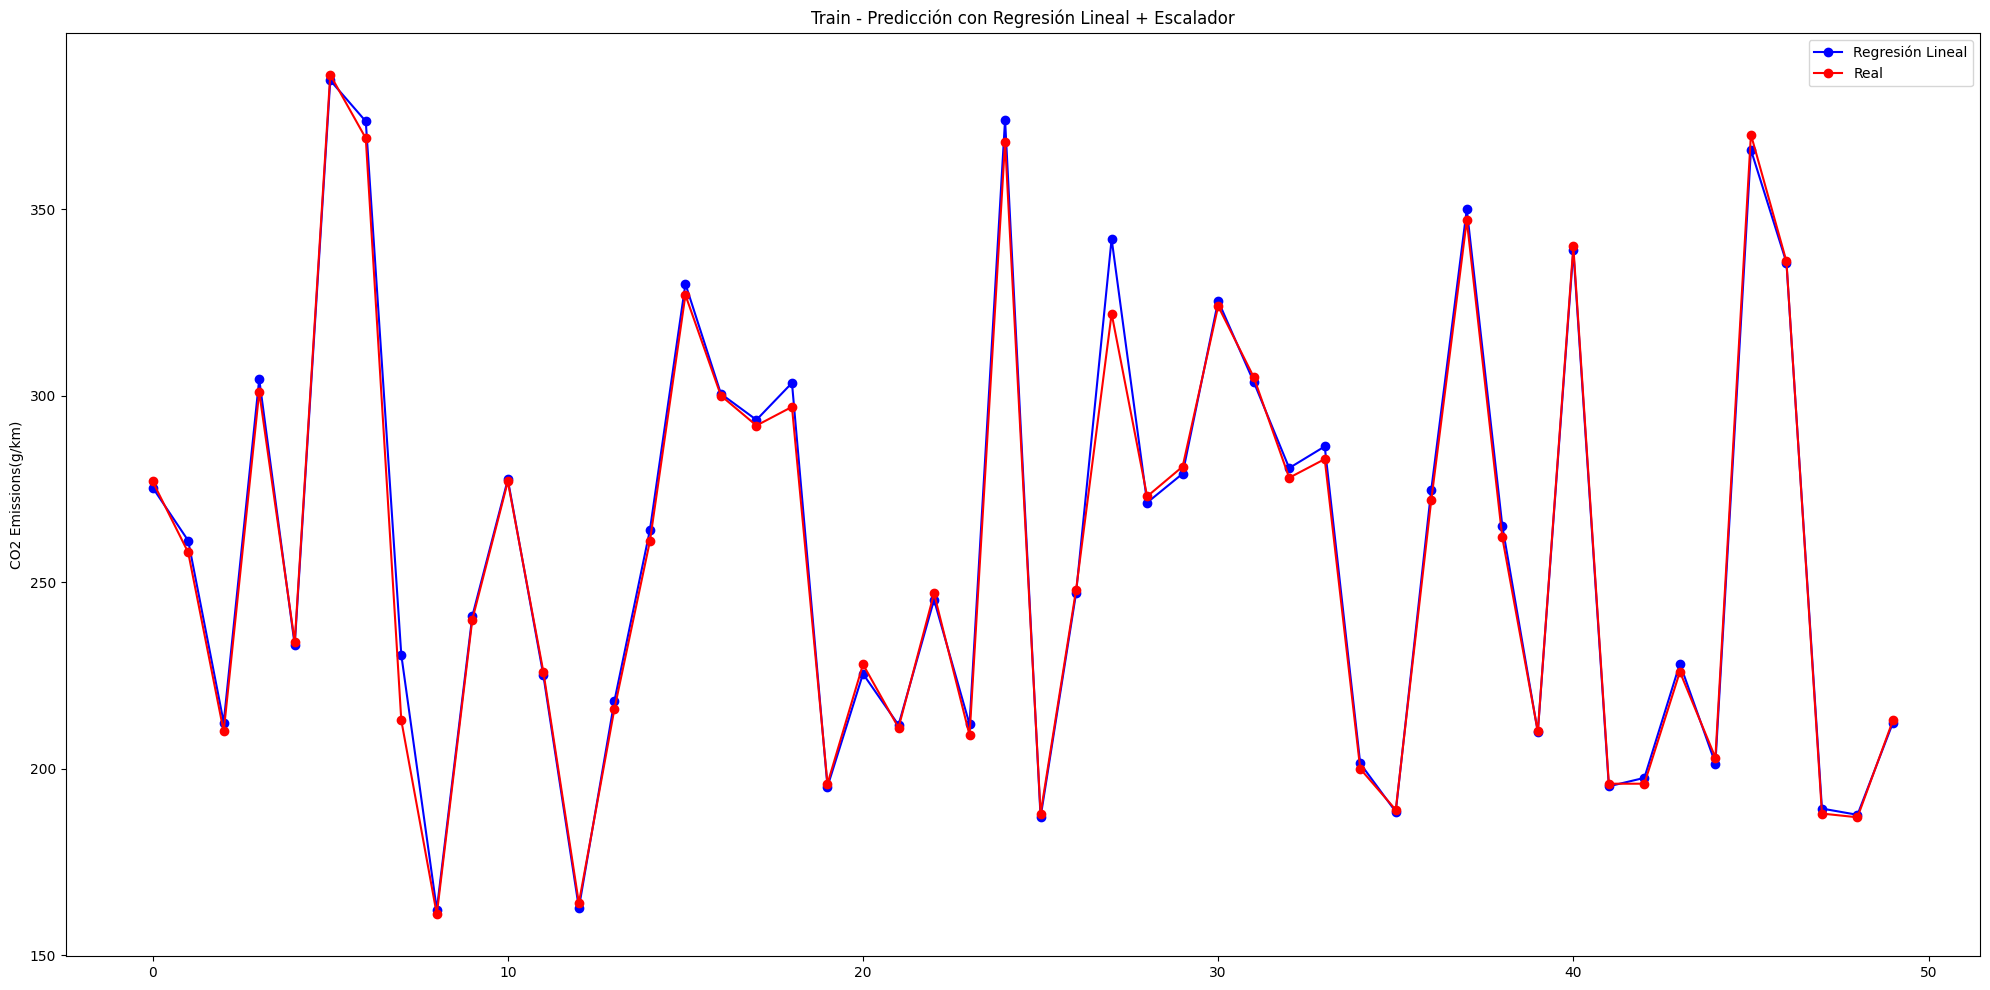

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred2[:50],'bo-', label='Regresión Lineal')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Train - Predicción con Regresión Lineal + Escalador',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

**4. Probar con datos desconocidos**

In [ ]:
test

Make                             Model  \
1481           FORD                         FIESTA ST   
4695           FORD                              EDGE   
5399         TOYOTA                       SEQUOIA 4WD   
4504            BMW                      X5 xDRIVE50i   
933     ROLLS-ROYCE                            WRAITH   
...             ...                               ...   
5545            BMW  M240i xDrive Coupe M Performance   
4689           FIAT                          500X AWD   
4326     VOLKSWAGEN                BEETLE CONVERTIBLE   
5160  MERCEDES-BENZ                E 400 4MATIC WAGON   
2770       INFINITI                          QX60 AWD   

                 Vehicle Class  Engine Size(L)  Cylinders Transmission  \
1481                SUBCOMPACT             1.6          4       Manual   
4695               SUV - SMALL             3.5          6    Automatic   
5399            SUV - STANDARD             5.7          8    Automatic   
4504            SUV - STANDARD             4.4          8    Automatic   
933                   MID-SIZE             6.6         12    Automatic   
...                        ...             ...        ...          ...   
5545                SUBCOMPACT             3.0          6    Automatic   
4689               SUV - SMALL             2.4          4    Automatic   
4326                SUBCOMPACT             1.8          4    Automatic   
5160  STATION WAGON - MID-SIZE             3.0          6    Automatic   
2770               SUV - SMALL             3.5          6    Automatic   

             Fuel Type  Fuel Consumption City (L/100 km)  \
1481  Regular Gasoline                               8.9   
4695  Regular Gasoline                              13.5   
5399  Regular Gasoline                              18.4   
4504  Premium Gasoline                              15.4   
933   Premium Gasoline                              18.7   
...                ...                               ...   
5545  Premium Gasoline                              11.3   
4689  Regular Gasoline                              11.0   
4326  Regular Gasoline                               9.7   
5160  Premium Gasoline                              12.4   
2770  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1481                           35                  184  
4695                           25                  270  
5399                           17                  384  
4504                           21                  317  
933                            18                  359  
...                           ...                  ...  
5545                           29                  229  
4689                           29                  226  
4326                           33                  199  
5160                           25                  261  
2770                           26                  252  

[1477 rows x 12 columns]

In [ ]:
# Estandarizacion tipo de transmisión
test['Transmission'] = test['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

# Estandarización tipo de combustible
test['Fuel Type'] = test['Fuel Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

In [ ]:
new_test2 = test.copy()
new_test2 = new_test2.drop(drop_fields, axis=1)
new_test2 = new_test2.drop_duplicates()
new_test2

Make             Vehicle Class  Engine Size(L)  Cylinders  \
1481           FORD                SUBCOMPACT             1.6          4   
4695           FORD               SUV - SMALL             3.5          6   
5399         TOYOTA            SUV - STANDARD             5.7          8   
4504            BMW            SUV - STANDARD             4.4          8   
933     ROLLS-ROYCE                  MID-SIZE             6.6         12   
...             ...                       ...             ...        ...   
5545            BMW                SUBCOMPACT             3.0          6   
4689           FIAT               SUV - SMALL             2.4          4   
4326     VOLKSWAGEN                SUBCOMPACT             1.8          4   
5160  MERCEDES-BENZ  STATION WAGON - MID-SIZE             3.0          6   
2770       INFINITI               SUV - SMALL             3.5          6   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
1481       Manual  Regular Gasoline                               8.9   
4695    Automatic  Regular Gasoline                              13.5   
5399    Automatic  Regular Gasoline                              18.4   
4504    Automatic  Premium Gasoline                              15.4   
933     Automatic  Premium Gasoline                              18.7   
...           ...               ...                               ...   
5545    Automatic  Premium Gasoline                              11.3   
4689    Automatic  Regular Gasoline                              11.0   
4326    Automatic  Regular Gasoline                               9.7   
5160    Automatic  Premium Gasoline                              12.4   
2770    Automatic  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1481                           35                  184  
4695                           25                  270  
5399                           17                  384  
4504                           21                  317  
933                            18                  359  
...                           ...                  ...  
5545                           29                  229  
4689                           29                  226  
4326                           33                  199  
5160                           25                  261  
2770                           26                  252  

[1363 rows x 11 columns]

In [ ]:
X_test, y_test = new_test2.drop([target_feature],axis=1), new_test2[target_feature]
display(X_test)
y_test

Make             Vehicle Class  Engine Size(L)  Cylinders  \
1481           FORD                SUBCOMPACT             1.6          4   
4695           FORD               SUV - SMALL             3.5          6   
5399         TOYOTA            SUV - STANDARD             5.7          8   
4504            BMW            SUV - STANDARD             4.4          8   
933     ROLLS-ROYCE                  MID-SIZE             6.6         12   
...             ...                       ...             ...        ...   
5545            BMW                SUBCOMPACT             3.0          6   
4689           FIAT               SUV - SMALL             2.4          4   
4326     VOLKSWAGEN                SUBCOMPACT             1.8          4   
5160  MERCEDES-BENZ  STATION WAGON - MID-SIZE             3.0          6   
2770       INFINITI               SUV - SMALL             3.5          6   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
1481       Manual  Regular Gasoline                               8.9   
4695    Automatic  Regular Gasoline                              13.5   
5399    Automatic  Regular Gasoline                              18.4   
4504    Automatic  Premium Gasoline                              15.4   
933     Automatic  Premium Gasoline                              18.7   
...           ...               ...                               ...   
5545    Automatic  Premium Gasoline                              11.3   
4689    Automatic  Regular Gasoline                              11.0   
4326    Automatic  Regular Gasoline                               9.7   
5160    Automatic  Premium Gasoline                              12.4   
2770    Automatic  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1481                              6.8                               8.0   
4695                              9.1                              11.5   
5399                             13.8                              16.4   
4504                             11.2                              13.5   
933                              11.8                              15.6   
...                               ...                               ...   
5545                              8.0                               9.8   
4689                              8.0                               9.7   
4326                              7.2                               8.5   
5160                              9.5                              11.1   
2770                              8.9                              10.7   

      Fuel Consumption Comb (mpg)  
1481                           35  
4695                           25  
5399                           17  
4504                           21  
933                            18  
...                           ...  
5545                           29  
4689                           29  
4326                           33  
5160                           25  
2770                           26  

[1363 rows x 10 columns]

1481    184
4695    270
5399    384
4504    317
933     359
       ... 
5545    229
4689    226
4326    199
5160    261
2770    252
Name: CO2 Emissions(g/km), Length: 1363, dtype: int64

In [ ]:
X_trans = pd.DataFrame(enc.transform(X_test[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat([X_trans, X_test[num_features]], axis=1)

X_test

Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
1481         0.0              0.0                0.0        0.0           0.0   
4695         0.0              0.0                0.0        0.0           0.0   
5399         0.0              0.0                0.0        0.0           0.0   
4504         0.0              0.0                0.0        0.0           0.0   
933          0.0              0.0                0.0        0.0           0.0   
...          ...              ...                ...        ...           ...   
5545         0.0              0.0                0.0        0.0           0.0   
4689         0.0              0.0                0.0        0.0           0.0   
4326         0.0              0.0                0.0        0.0           0.0   
5160         0.0              0.0                0.0        0.0           0.0   
2770         0.0              0.0                0.0        0.0           0.0   

      Make_BMW  Make_BUGATTI  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  ...  \
1481       0.0           0.0         0.0            0.0             0.0  ...   
4695       0.0           0.0         0.0            0.0             0.0  ...   
5399       0.0           0.0         0.0            0.0             0.0  ...   
4504       1.0           0.0         0.0            0.0             0.0  ...   
933        0.0           0.0         0.0            0.0             0.0  ...   
...        ...           ...         ...            ...             ...  ...   
5545       1.0           0.0         0.0            0.0             0.0  ...   
4689       0.0           0.0         0.0            0.0             0.0  ...   
4326       0.0           0.0         0.0            0.0             0.0  ...   
5160       0.0           0.0         0.0            0.0             0.0  ...   
2770       0.0           0.0         0.0            0.0             0.0  ...   

      Fuel Type_Ethanol  Fuel Type_Natural Gas  Fuel Type_Premium Gasoline  \
1481                0.0                    0.0                         0.0   
4695                0.0                    0.0                         0.0   
5399                0.0                    0.0                         0.0   
4504                0.0                    0.0                         1.0   
933                 0.0                    0.0                         1.0   
...                 ...                    ...                         ...   
5545                0.0                    0.0                         1.0   
4689                0.0                    0.0                         0.0   
4326                0.0                    0.0                         0.0   
5160                0.0                    0.0                         1.0   
2770                0.0                    0.0                         1.0   

      Fuel Type_Regular Gasoline  Fuel Consumption Hwy (L/100 km)  Cylinders  \
1481                         1.0                              6.8          4   
4695                         1.0                              9.1          6   
5399                         1.0                             13.8          8   
4504                         0.0                             11.2          8   
933                          0.0                             11.8         12   
...                          ...                              ...        ...   
5545                         0.0                              8.0          6   
4689                         1.0                              8.0          4   
4326                         1.0                              7.2          4   
5160                         0.0                              9.5          6   
2770                         0.0                              8.9          6   

      Fuel Consumption City (L/100 km)  Engine Size(L)  \
1481                               8.9             1.6   
4695                              13.5             3.5   


In [ ]:
# Aplicamos One hot Encoder a nuestro set de test
X_test_norm = scaler.transform(X_test[num_features])
X_test_norm = pd.DataFrame(X_test_norm, columns=num_features, index=X_test.index)

# Seleccionar solo las columnas no numéricas de X_train
non_num_features = list(set(X_train.columns) - set(num_features))
X_test_non_num = X_test[non_num_features]

# Concatenar las columnas no numéricas con las numéricas normalizadas
X_test_final = pd.concat([X_test_non_num, X_test_norm], axis=1)

X_test_norm = X_test_final
X_test_norm

Make_FORD  Make_VOLVO  Make_LINCOLN  Transmission_Automatic  Make_MAZDA  \
1481        1.0         0.0           0.0                     0.0         0.0   
4695        1.0         0.0           0.0                     1.0         0.0   
5399        0.0         0.0           0.0                     1.0         0.0   
4504        0.0         0.0           0.0                     1.0         0.0   
933         0.0         0.0           0.0                     1.0         0.0   
...         ...         ...           ...                     ...         ...   
5545        0.0         0.0           0.0                     1.0         0.0   
4689        0.0         0.0           0.0                     1.0         0.0   
4326        0.0         0.0           0.0                     1.0         0.0   
5160        0.0         0.0           0.0                     1.0         0.0   
2770        0.0         0.0           0.0                     1.0         0.0   

      Make_GENESIS  Make_FIAT  Vehicle Class_STATION WAGON - MID-SIZE  \
1481           0.0        0.0                                     0.0   
4695           0.0        0.0                                     0.0   
5399           0.0        0.0                                     0.0   
4504           0.0        0.0                                     0.0   
933            0.0        0.0                                     0.0   
...            ...        ...                                     ...   
5545           0.0        0.0                                     0.0   
4689           0.0        1.0                                     0.0   
4326           0.0        0.0                                     0.0   
5160           0.0        0.0                                     1.0   
2770           0.0        0.0                                     0.0   

      Make_MASERATI  Vehicle Class_SPECIAL PURPOSE VEHICLE  ...  Make_SMART  \
1481            0.0                                    0.0  ...         0.0   
4695            0.0                                    0.0  ...         0.0   
5399            0.0                                    0.0  ...         0.0   
4504            0.0                                    0.0  ...         0.0   
933             0.0                                    0.0  ...         0.0   
...             ...                                    ...  ...         ...   
5545            0.0                                    0.0  ...         0.0   
4689            0.0                                    0.0  ...         0.0   
4326            0.0                                    0.0  ...         0.0   
5160            0.0                                    0.0  ...         0.0   
2770            0.0                                    0.0  ...         0.0   

      Vehicle Class_VAN - PASSENGER  Make_HYUNDAI  Make_NISSAN  \
1481                            0.0           0.0          0.0   
4695                            0.0           0.0          0.0   
5399                            0.0           0.0          0.0   
4504                            0.0           0.0          0.0   
933                             0.0           0.0          0.0   
...                             ...           ...          ...   
5545                            0.0           0.0          0.0   
4689                            0.0           0.0          0.0   
4326                            0.0           0.0          0.0   
5160                            0.0           0.0          0.0   
2770                            0.0           0.0          0.0   

      Fuel Consumption Hwy (L/100 km)  Cylinders  \
1481                        -0.970152  -0.855329   
4695                         0.022596   0.244650   
5399                         2.051257   1.344628   
4504                         0.929019   1.344628   
933                          1.187997   3.544585   
...                               ...        ...   
5545                        -0.452196   0.244650  

In [ ]:
y_pred_test2 = LinearModel2.predict(X_test_norm)
y_pred_test2

array([188.25272104, 269.69022992, 374.56852083, ..., 198.05648714,
       259.72427916, 250.75028266])

In [ ]:
n,p = X_test_norm.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test2))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test2) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test2) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test2))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 22.64
Root of sum of squares (RMSE): 4.76
R2-score: 0.99285
Adj R2-score: 0.99246


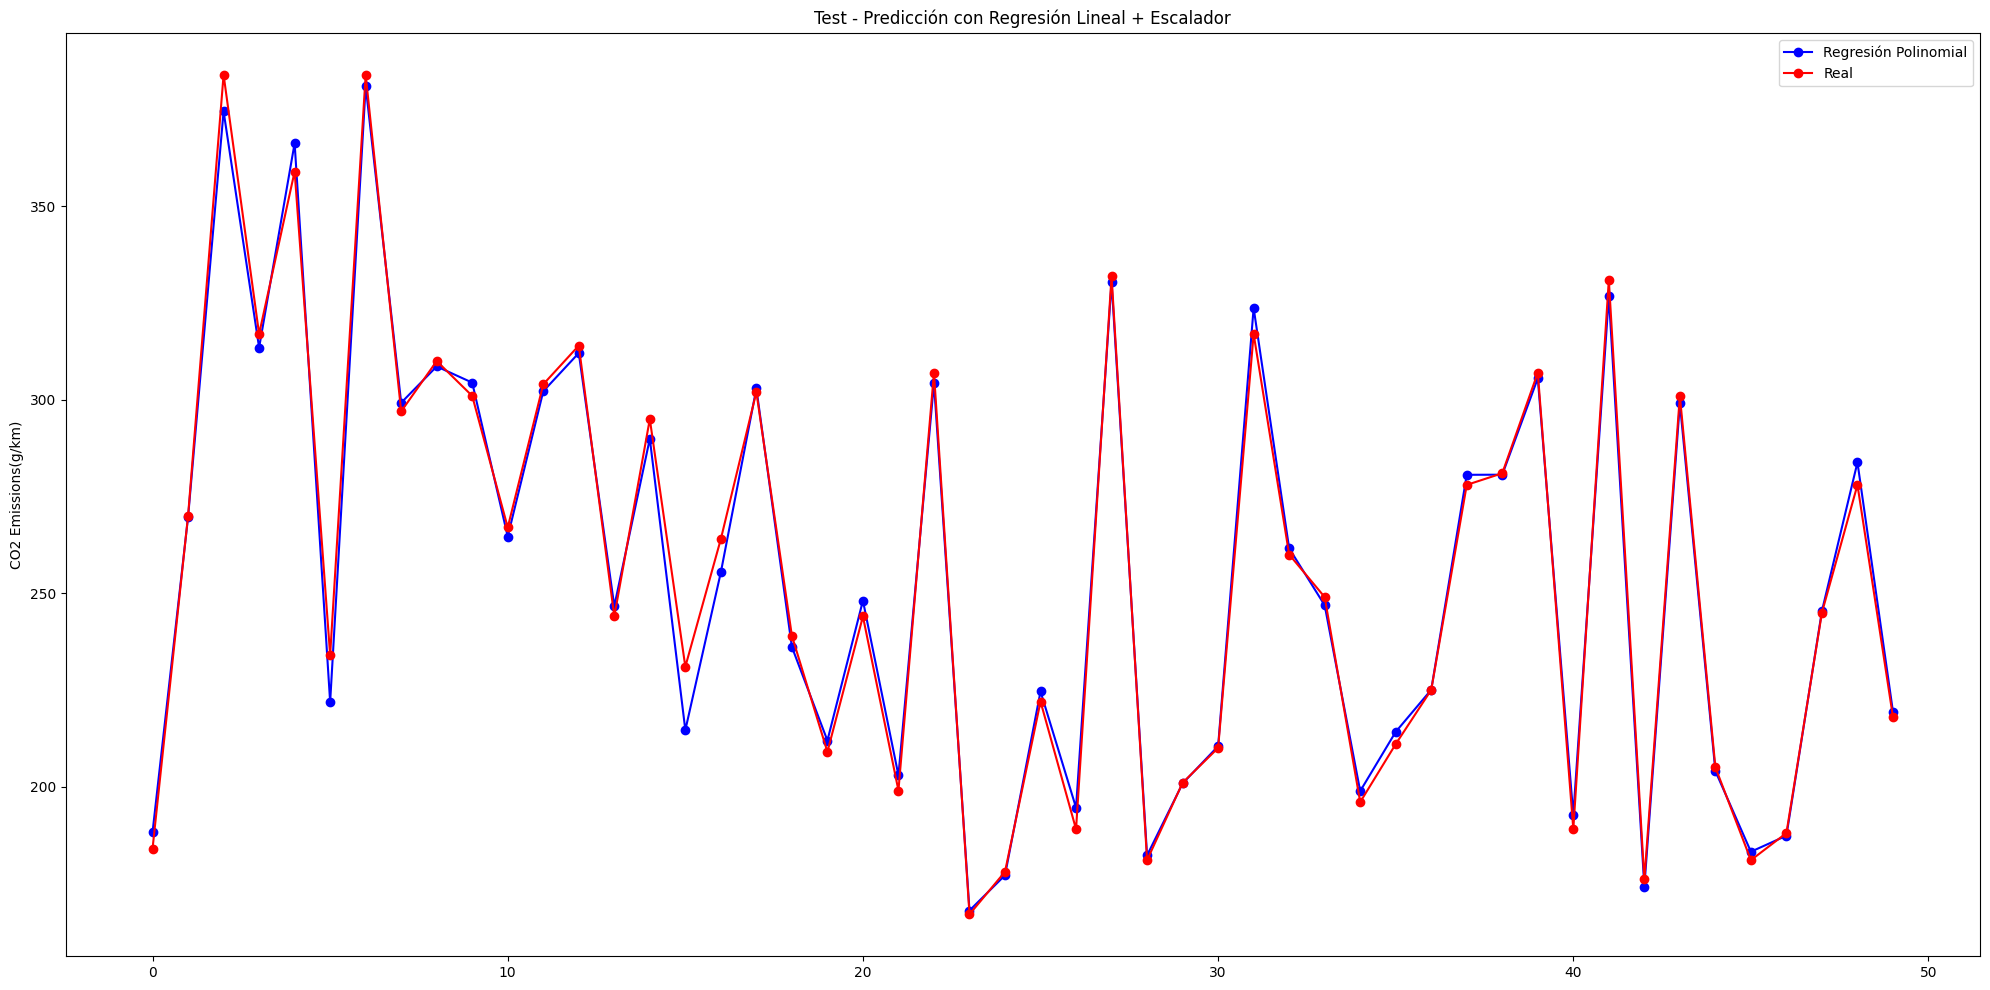

In [ ]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_test1[:50],'bo-', label='Regresión Polinomial')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Test - Predicción con Regresión Lineal + Escalador',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

A veces... la mejora no viene por usar estandarizadores (a pesar de que nos da más confianza los datos generados) sino puede que su mejora sea por otro tipo de regresión, la cual será vista la próxima sesión.

# 3. Preguntas

- Interprete los coeficientes de las variables del segundo modelo de regresión lineal con el escalador.

Respuesta:

- ¿En qué se diferencia `.fit_transform()` y `.tranform()`? ¿Cuándo se usa cada uno?

Respuesta:

- ¿Cuáles son las diferencias entre `StandardScaler()`, `MinMaxScaler()`, `RobustScaler()`? ¿Qué pasa con el rendimiento sobre el conjunto test si cambiamos el escalador por una de estas dos opciones?

Respuesta:

In [ ]:
# Ajuste el escalador del set de entrenamiento y luego aplíquelo al set de test y revise los resultados:


# Mejoró? Empeoró? No hubo cambios?

- ¿Se podría automatizar el proceso? ¿Cómo guardamos nuestro proceso para no volver a entrenar cada vez que querramos realizar una predicción?


Respuesta: